# IBM Employee Attrition Prediction Model

In [1]:
#Importing libraries
import numpy as np # library used for working with arrays
import pandas as pd # library used for data manipulation and analysis
import seaborn as sns # library for visualization
import matplotlib
import matplotlib.pyplot as plt # library for visualization
%matplotlib inline

#to suppress warnings
from sklearn.metrics import accuracy_score


import warnings
warnings.filterwarnings('ignore')

In [51]:
#Reading the dataset
attrition_data = pd.read_csv('ibmemployee_attrition.csv')

## Understanding the Data

In [52]:
#Displaying the dataset
attrition_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [8]:
attrition_data.shape

(1470, 35)

In [9]:
attrition_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [10]:
#exploring the dataset
attrition_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## Exploratory Data Analysis

Attrition
No     83.9%
Yes    16.1%
Name: proportion, dtype: object


<Axes: title={'center': 'Attrition Percentage'}, ylabel='count'>

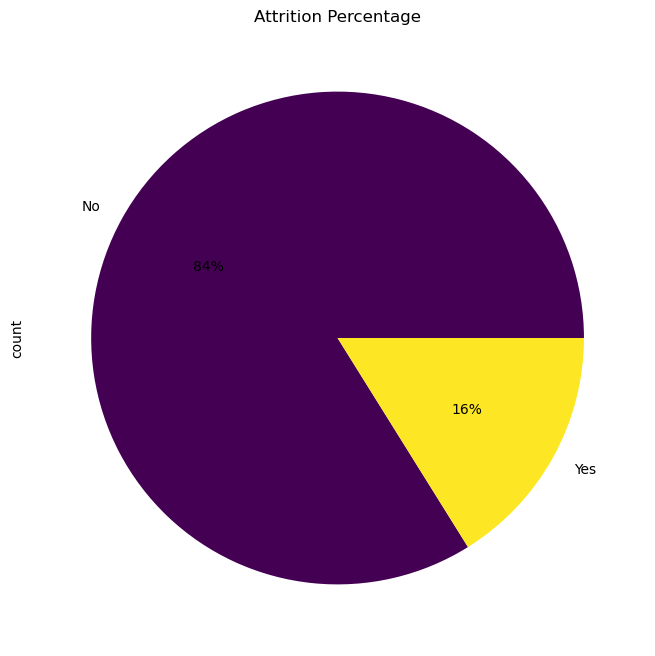

In [92]:
# Creating a count variable to store count of data variables grouped by Attrition
total_count_display = attrition_data['Attrition'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
print(total_count_display)

#Plotting a pie chart of the values
attrition_data.Attrition.value_counts().plot(kind='pie',
                                                autopct='%1.0f%%',title = "Attrition Percentage",
                                               figsize=(10, 8), colormap = 'viridis')

<Axes: title={'center': 'Attrition by Age'}, xlabel='Age', ylabel='Count'>

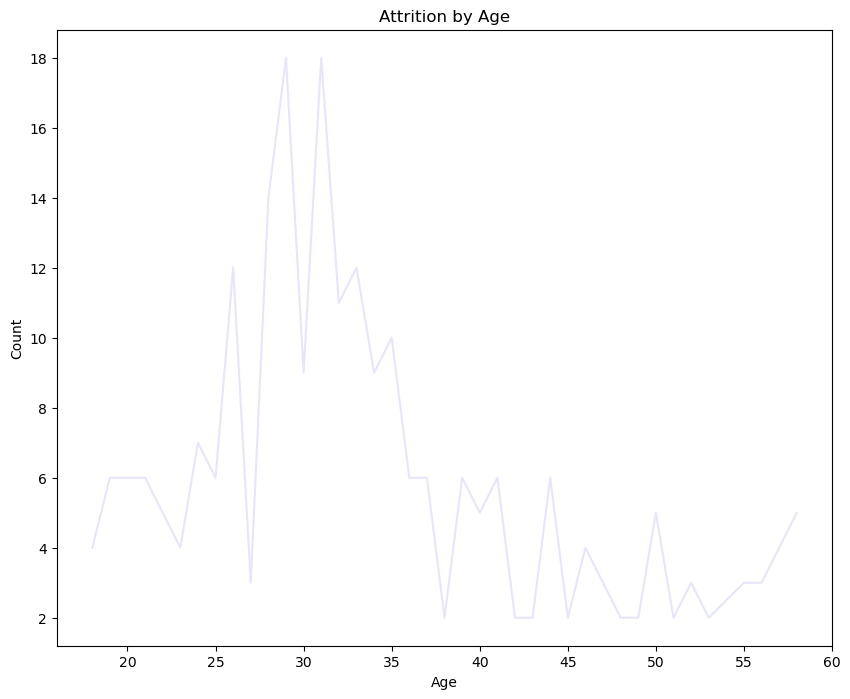

In [93]:
# Grouping Attrition values by Job Level
attrition_count_age = attrition_data.groupby('Age')['Attrition'].value_counts().loc[:, 'Yes']

#Plotting Attrition by Age
attrition_count_age.plot(kind='line', title='Attrition by Age', ylabel='Count',
                                xlabel='Age', figsize=(10,8) , color = 'lavender')

Gender
Female     87
Male      150
Name: count, dtype: int64


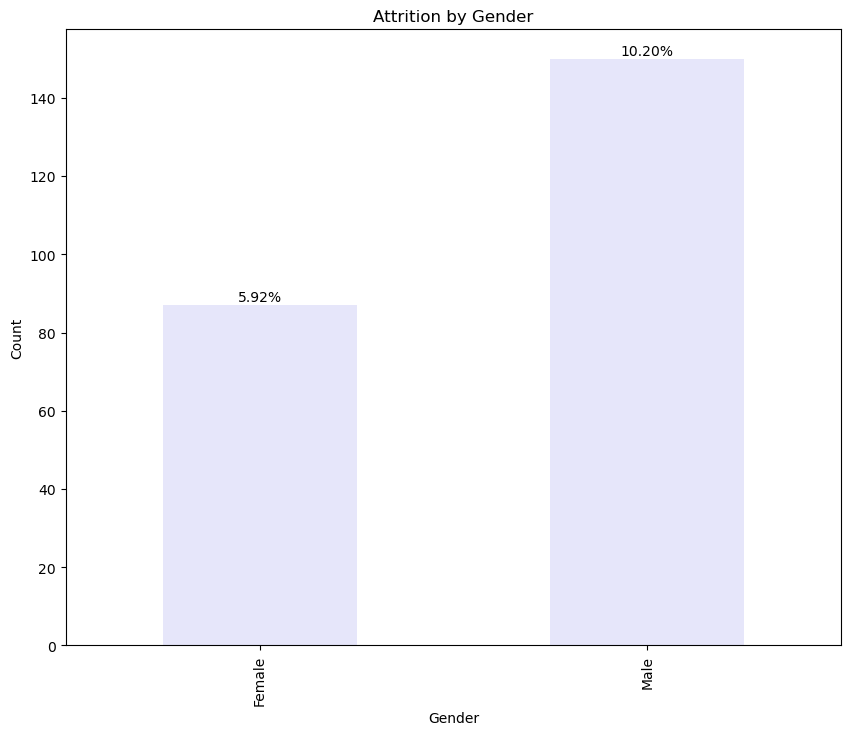

In [22]:
# Grouping Attrition values by Gender
attrition_count_gender= attrition_data.groupby('Gender')['Attrition'].value_counts().loc[:, 'Yes']

print(attrition_count_gender)

#Plotting Attrition by Gender
attrition_count_gender.plot(kind='bar', title='Attrition by Gender', ylabel='Count',
                                xlabel='Gender', figsize=(10,8) , color = 'lavender')

# # # #showing the percentage
for i in range(attrition_count_gender.shape[0]):
    count = attrition_count_gender[i]
    strt = '{:0.2f}%'.format((100 * count)/attrition_data.shape[0])
    plt.text(i, count+1, strt, ha = 'center', color = 'black', fontsize = 10)

EducationField
Human Resources      7
Life Sciences       89
Marketing           35
Medical             63
Other               11
Technical Degree    32
Name: count, dtype: int64


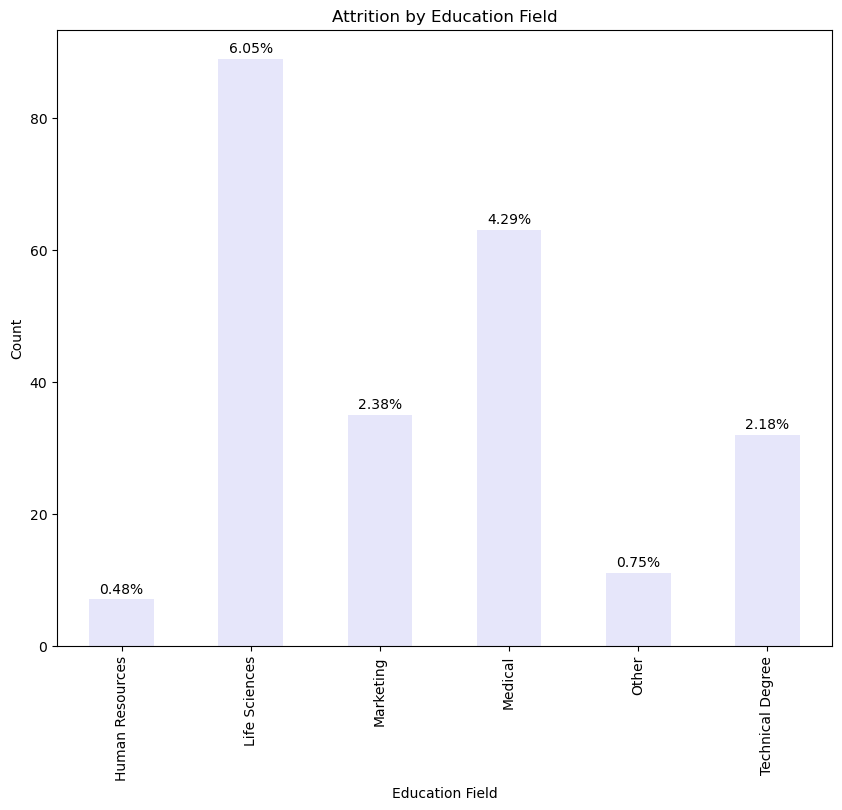

In [23]:
# Grouping Attrition values by Education Field
attrition_count_educationfield= attrition_data.groupby('EducationField')['Attrition'].value_counts().loc[:, 'Yes']

print(attrition_count_educationfield)

#Plotting Attrition by Education Field
attrition_count_educationfield.plot(kind='bar', title='Attrition by Education Field', ylabel='Count',
                                xlabel='Education Field', figsize=(10,8) , color = 'lavender')

# # # #showing the percentage
for i in range(attrition_count_educationfield.shape[0]):
    count = attrition_count_educationfield[i]
    strt = '{:0.2f}%'.format((100 * count)/attrition_data.shape[0])
    plt.text(i, count+1, strt, ha = 'center', color = 'black', fontsize = 10)

Education
1    31
2    44
3    99
4    58
5     5
Name: count, dtype: int64


<Axes: title={'center': 'Attrition by Education'}, xlabel='education', ylabel='Count'>

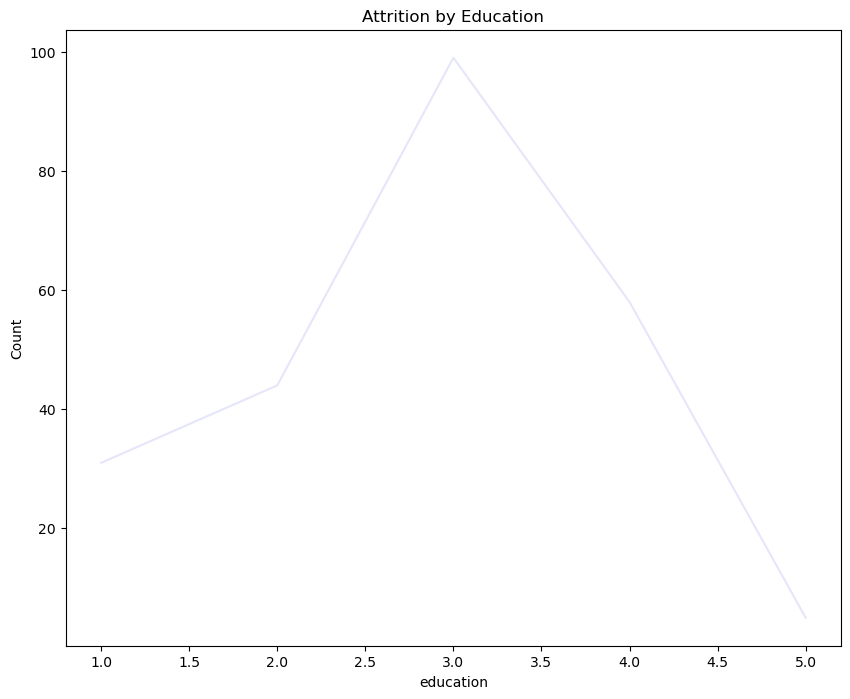

In [21]:
# Grouping Attrition values by Education
attrition_count_education= attrition_data.groupby('Education')['Attrition'].value_counts().loc[:, 'Yes']

print(attrition_count_education)

#Plotting Attrition by Education Level
attrition_count_education.plot(kind='line', title='Attrition by Education', ylabel='Count',
                                xlabel='education', figsize=(10,8) , color = 'lavender')


MaritalStatus
Divorced     33
Married      84
Single      120
Name: count, dtype: int64


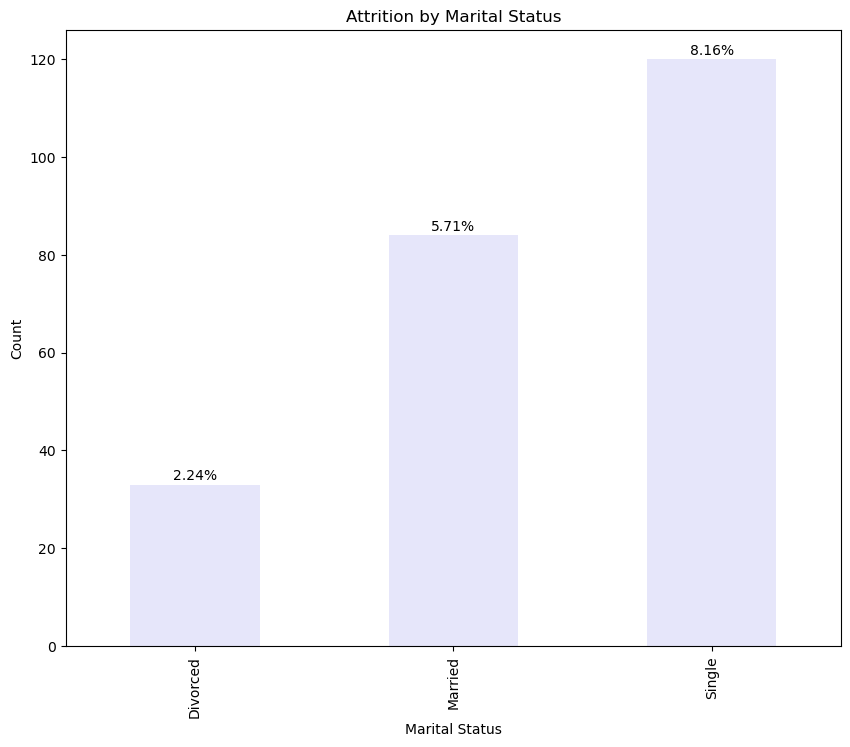

In [24]:
# Grouping Attrition values by Marital Status
attrition_count_maritalstatus = attrition_data.groupby('MaritalStatus')['Attrition'].value_counts().loc[:, 'Yes']

print(attrition_count_maritalstatus)

#
attrition_count_maritalstatus.plot(kind='bar', title='Attrition by Marital Status', ylabel='Count',
                                xlabel='Marital Status', figsize=(10,8) , color = 'lavender')

# # # #showing the percentage
for i in range(attrition_count_maritalstatus.shape[0]):
    count = attrition_count_maritalstatus[i]
    strt = '{:0.2f}%'.format((100 * count)/attrition_data.shape[0])
    plt.text(i, count+1, strt, ha = 'center', color = 'black', fontsize = 10)

WorkLifeBalance
1     25
2     58
3    127
4     27
Name: count, dtype: int64


<Axes: title={'center': 'Attrition by Work Life Balance'}, xlabel='Work Life Balance', ylabel='Count'>

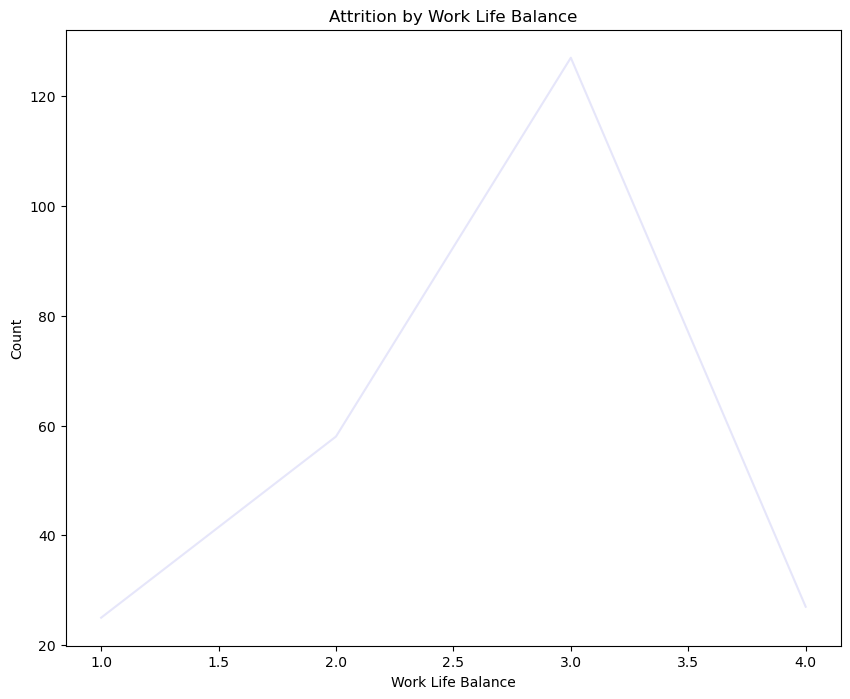

In [101]:
# Grouping Attrition values by Work Life Balance
attrition_count_worklifebalance = attrition_data.groupby('WorkLifeBalance')['Attrition'].value_counts().loc[:, 'Yes']

print(attrition_count_worklifebalance)

# Plotting Attrition by Work Life Balance
attrition_count_worklifebalance.plot(kind='line', title='Attrition by Work Life Balance', ylabel='Count',
                                xlabel='Work Life Balance', figsize=(10,8) , color = 'lavender')

<Axes: title={'center': 'Attrition by Daily Rate'}, xlabel='Daily Rate', ylabel='Count'>

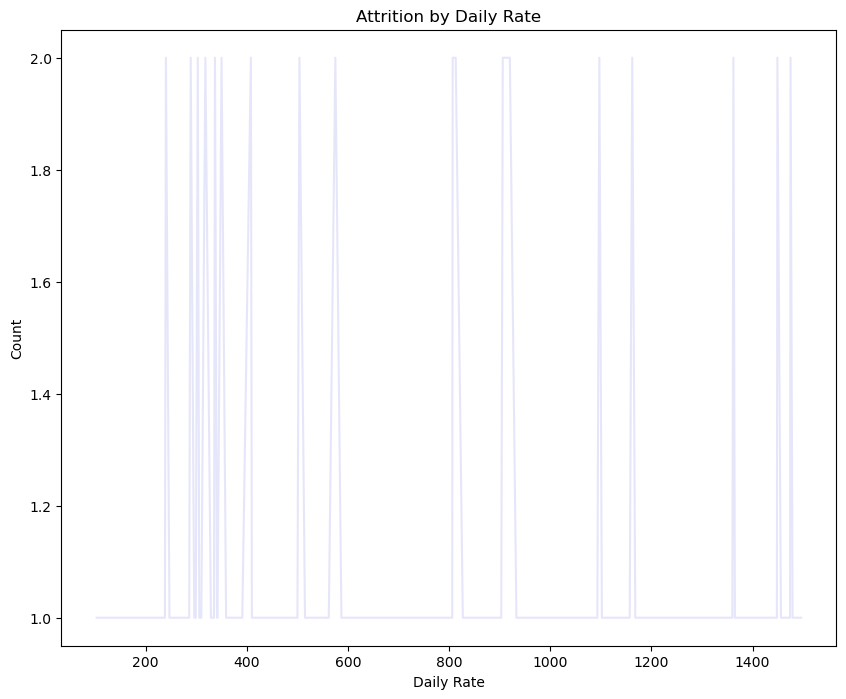

In [95]:
# Grouping Attrition values by Daily Rate
attrition_count_dailyrate = attrition_data.groupby('DailyRate')['Attrition'].value_counts().loc[:, 'Yes']


#Plotting Attrition by Daily Rate
attrition_count_dailyrate.plot(kind='line', title='Attrition by Daily Rate', ylabel='Count',
                                xlabel='Daily Rate', figsize=(10,8) , color = 'lavender')


<Axes: title={'center': 'Attrition by Monthly Income'}, xlabel='Monthly Income', ylabel='Count'>

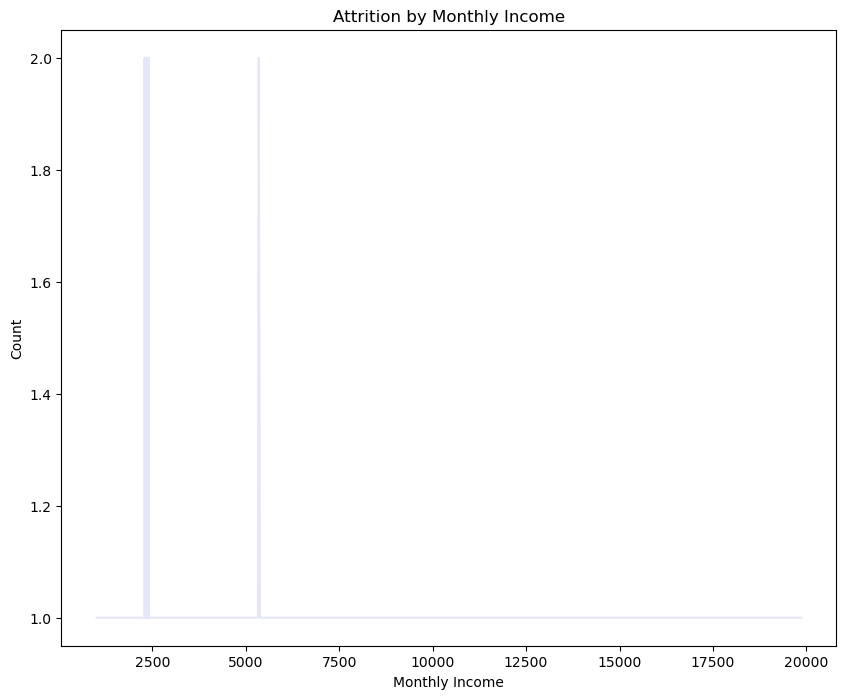

In [96]:
# Grouping Attrition values by Monthly Income
attrition_count_monthlyincome = attrition_data.groupby('MonthlyIncome')['Attrition'].value_counts().loc[:, 'Yes']


# Plotting Attrition by Monthly Income
attrition_count_monthlyincome.plot(kind='line', title='Attrition by Monthly Income', ylabel='Count',
                                xlabel='Monthly Income', figsize=(10,8) , color = 'lavender')


<Axes: title={'center': 'Attrition by Salary Hike'}, xlabel='Salary Hike', ylabel='Count'>

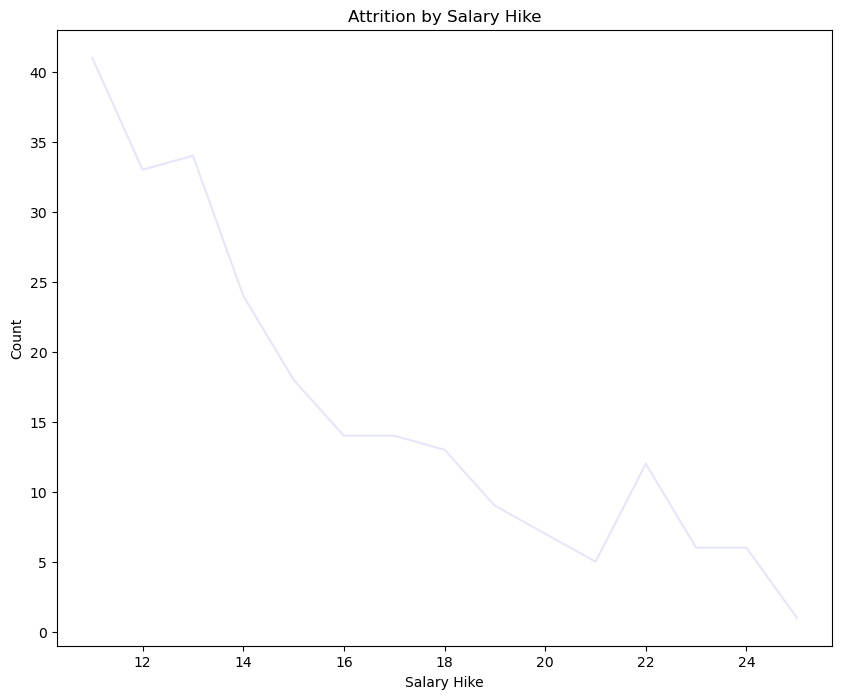

In [97]:
# Grouping Attrition values by Salary Hike
attrition_count_salaryhike = attrition_data.groupby('PercentSalaryHike')['Attrition'].value_counts().loc[:, 'Yes']

#Plotting Attrition by Salary Hike
attrition_count_salaryhike.plot(kind='line', title='Attrition by Salary Hike', ylabel='Count',
                                xlabel='Salary Hike', figsize=(10,8) , color = 'lavender')

<Axes: title={'center': 'Attrition by Performance Rating'}, xlabel='Performance Rating', ylabel='Count'>

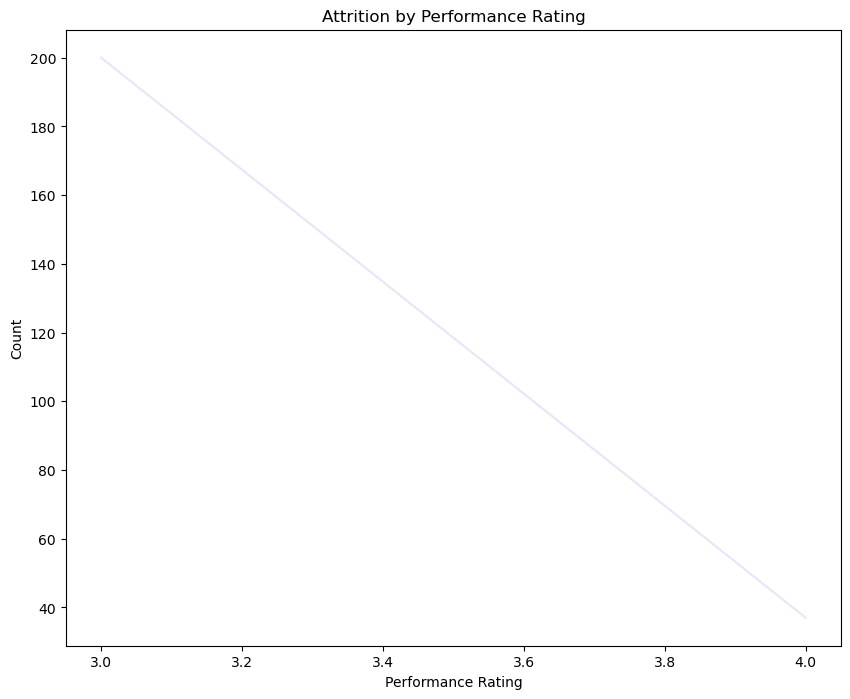

In [98]:
# Grouping Attrition values by Performance Rating
attrition_count_performancerating = attrition_data.groupby('PerformanceRating')['Attrition'].value_counts().loc[:, 'Yes']

#Plotting Attrition by Performance Rating
attrition_count_performancerating.plot(kind='line', title='Attrition by Performance Rating', ylabel='Count',
                                xlabel='Performance Rating', figsize=(10,8) , color = 'lavender')


<Axes: title={'center': 'Attrition by Total Working Years'}, xlabel='Total Working Years', ylabel='Count'>

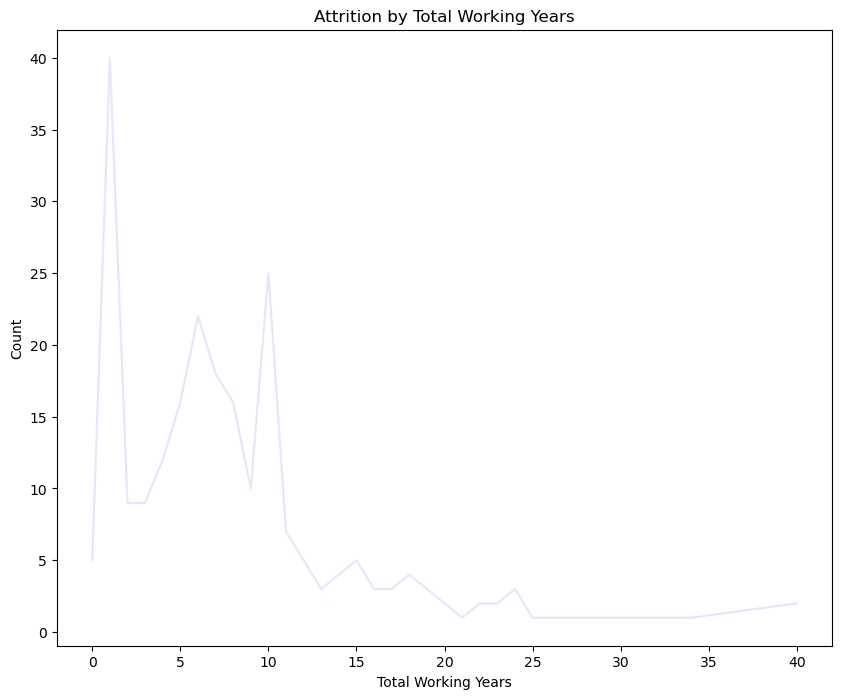

In [99]:
# Grouping Attrition values by Total Working Years
attrition_count_totalworkingyears = attrition_data.groupby('TotalWorkingYears')['Attrition'].value_counts().loc[:, 'Yes']

#Plotting Attrition by Total Working Years
attrition_count_totalworkingyears.plot(kind='line', title='Attrition by Total Working Years', ylabel='Count',
                                xlabel='Total Working Years', figsize=(10,8) , color = 'lavender')

<Axes: title={'center': 'Attrition by Number of Companies Worked'}, xlabel='Number of Companies Worked', ylabel='Count'>

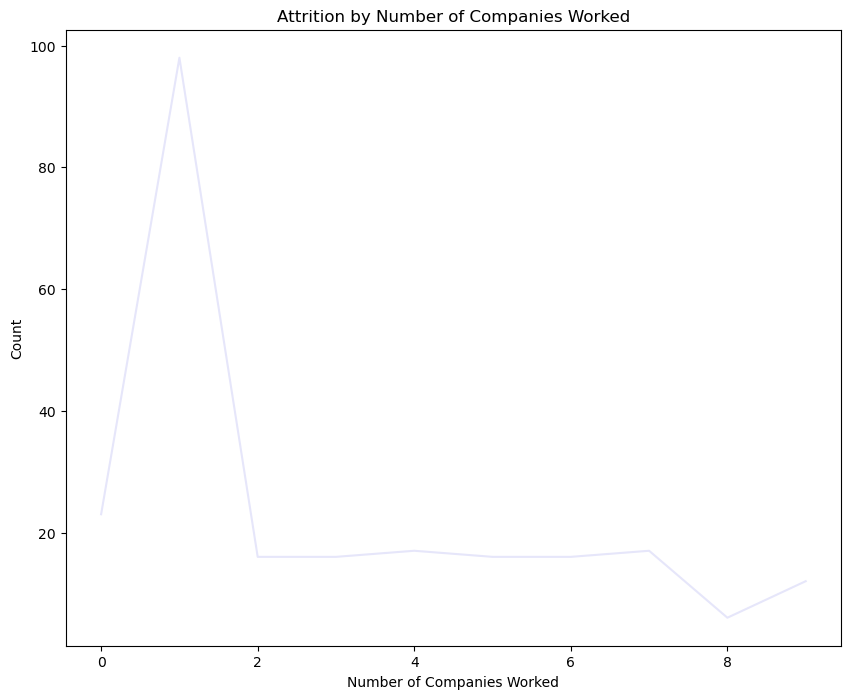

In [100]:
# Grouping Attrition values by Number of Companies Worked
attrition_count_numcompaniesworked = attrition_data.groupby('NumCompaniesWorked')['Attrition'].value_counts().loc[:, 'Yes']

# Plotting Attrition by Number of Companies Worked
attrition_count_numcompaniesworked.plot(kind='line', title='Attrition by Number of Companies Worked', ylabel='Count',
                                xlabel='Number of Companies Worked', figsize=(10,8) , color = 'lavender')

<Axes: title={'center': 'Attrition by Distance from Home'}, xlabel='Distance from Home', ylabel='Count'>

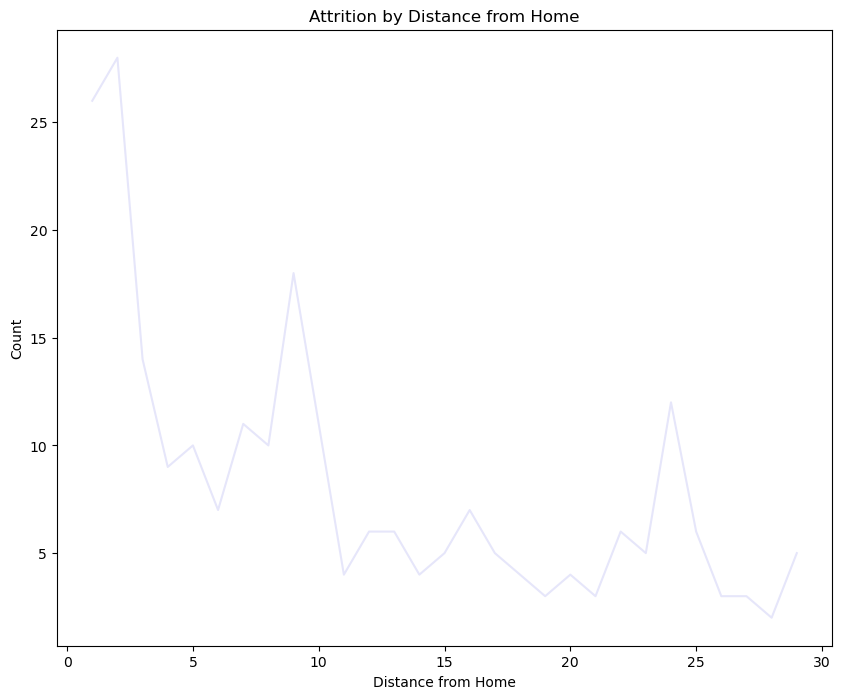

In [94]:
# Grouping Attrition values by Distance from Home
attrition_count_homedistance = attrition_data.groupby('DistanceFromHome')['Attrition'].value_counts().loc[:, 'Yes']

#Plotting Attrition by Distance from Home
attrition_count_homedistance.plot(kind='line', title='Attrition by Distance from Home', ylabel='Count',
                                xlabel='Distance from Home', figsize=(10,8) , color = 'lavender')

<Axes: title={'center': 'Attrition by Years at Company'}, xlabel='Years at Company', ylabel='Count'>

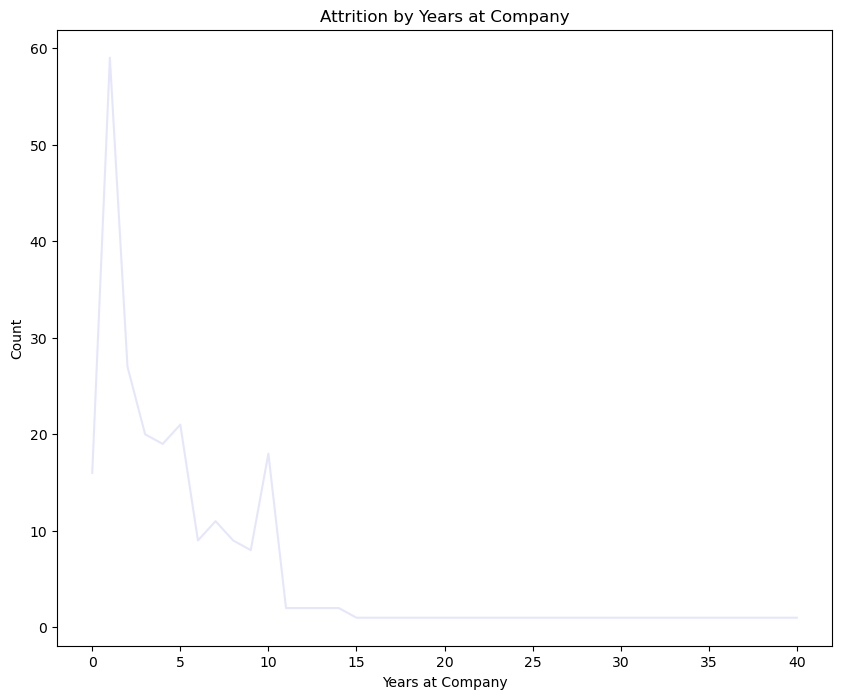

In [103]:
# Grouping Attrition values by Years at Company 
attrition_count_yearsatcompany = attrition_data.groupby('YearsAtCompany')['Attrition'].value_counts().loc[:, 'Yes']

#Attrition by Years at Company
attrition_count_yearsatcompany.plot(kind='line', title='Attrition by Years at Company', ylabel='Count',
                                xlabel='Years at Company', figsize=(10,8) , color = 'lavender')


<Axes: title={'center': 'Attrition by Training Times Last Year'}, xlabel='Training Times Last Year', ylabel='Count'>

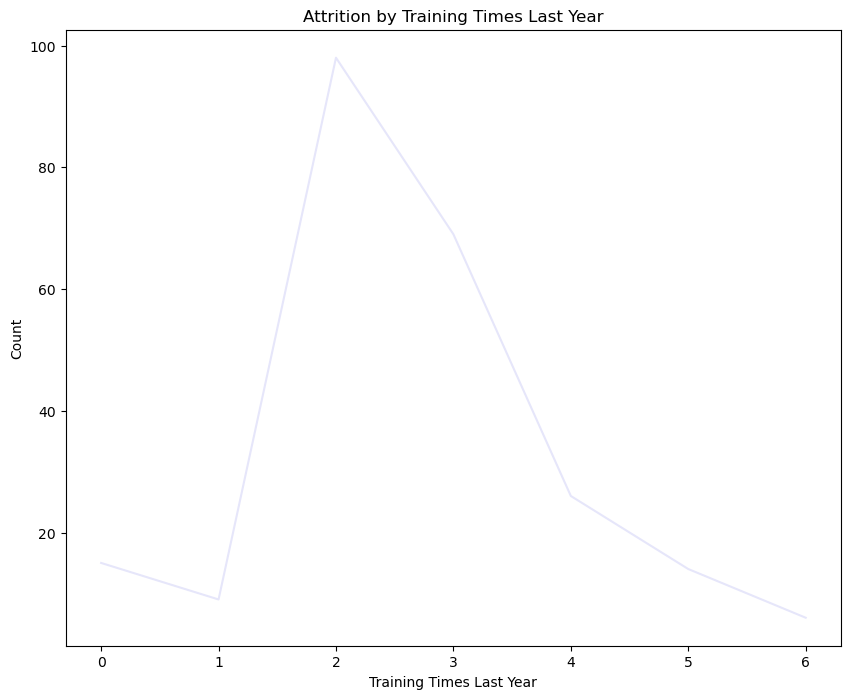

In [102]:
# Grouping Attrition values by Training Times Last Year
attrition_count_trainingtimes = attrition_data.groupby('TrainingTimesLastYear')['Attrition'].value_counts().loc[:, 'Yes']


#Plotting Attrition by Training Times Last Year
attrition_count_trainingtimes.plot(kind='line', title='Attrition by Training Times Last Year', ylabel='Count',
                                xlabel='Training Times Last Year', figsize=(10,8) , color = 'lavender')

Department
Human Resources            12
Research & Development    133
Sales                      92
Name: count, dtype: int64


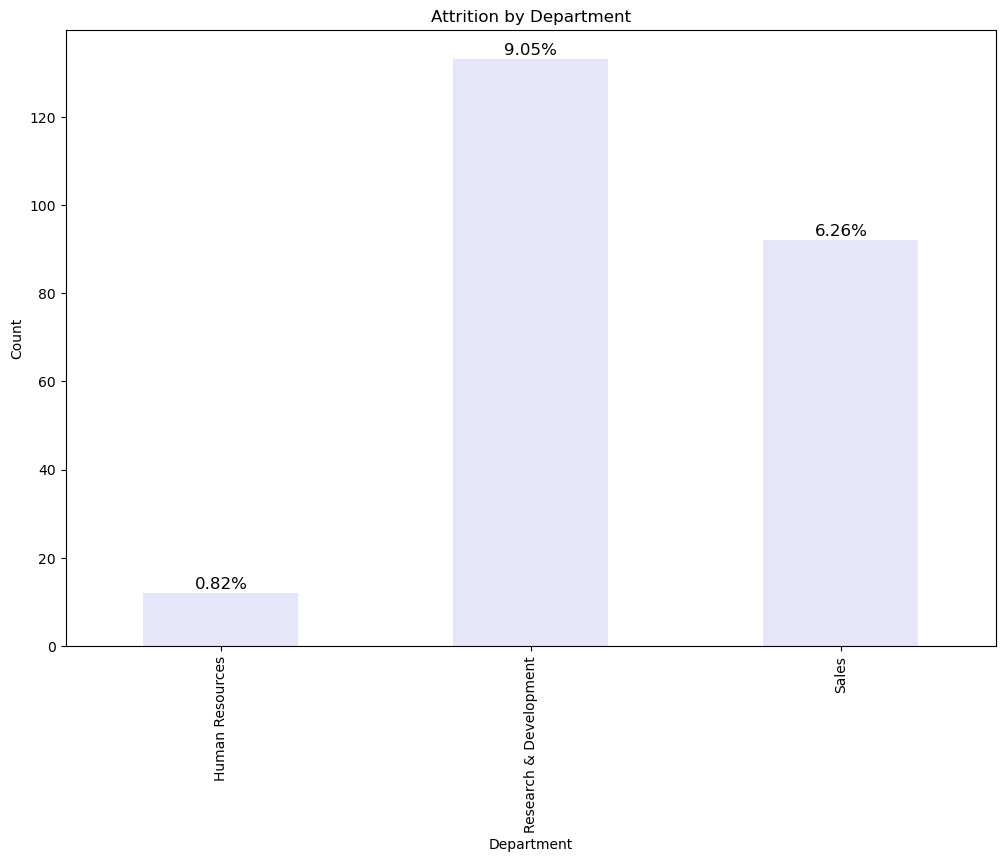

In [12]:
# Grouping Attrition values by Department
attrition_count_department = attrition_data.groupby('Department')['Attrition'].value_counts().loc[:, 'Yes']

print(attrition_count_department)

#Plotting a bar chart
attrition_count_department.plot(kind='bar', title='Attrition by Department', ylabel='Count',
                                xlabel='Department', figsize=(12,8) , color = 'lavender')
#showing the percentage
for i in range(attrition_count_department.shape[0]):
    count = attrition_count_department[i]
    strt = '{:0.2f}%'.format((100 * count)/attrition_data.shape[0])
    plt.text(i, count + 1, strt, ha = 'center', color = 'black', fontsize = 12)

JobLevel
1    143
2     52
3     32
4      5
5      5
Name: count, dtype: int64


<Axes: title={'center': 'Attrition by Job Level'}, xlabel='Job Level', ylabel='Count'>

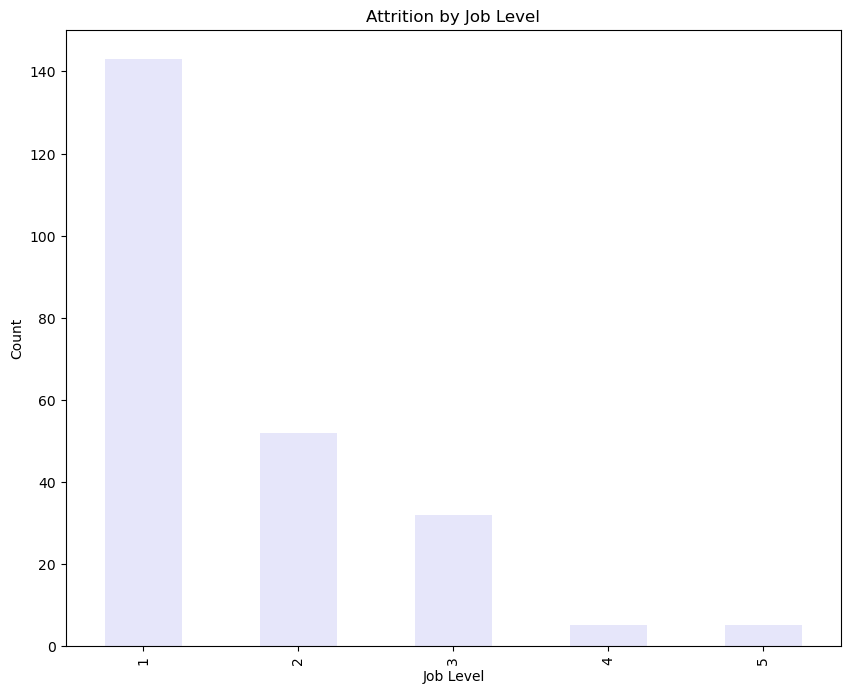

In [13]:
# Grouping Attrition values by Job Level
attrition_count_joblevel = attrition_data.groupby('JobLevel')['Attrition'].value_counts().loc[:, 'Yes']

print(attrition_count_joblevel)

attrition_count_joblevel.plot(kind='bar', title='Attrition by Job Level', ylabel='Count',
                                xlabel='Job Level', figsize=(10,8) , color = 'lavender')

#showing the percentage
# for i in range(attrition_count_joblevel.shape[0]):
#     count = attrition_count_joblevel[i]
#     strt = '{:0.2f}%'.format((100 * count)/attrition_data.shape[0])
#     plt.text(i, count + 1, strt, ha = 'center', color = 'black', fontsize = 12)

JobRole
Healthcare Representative     9
Human Resources              12
Laboratory Technician        62
Manager                       5
Manufacturing Director       10
Research Director             2
Research Scientist           47
Sales Executive              57
Sales Representative         33
Name: count, dtype: int64


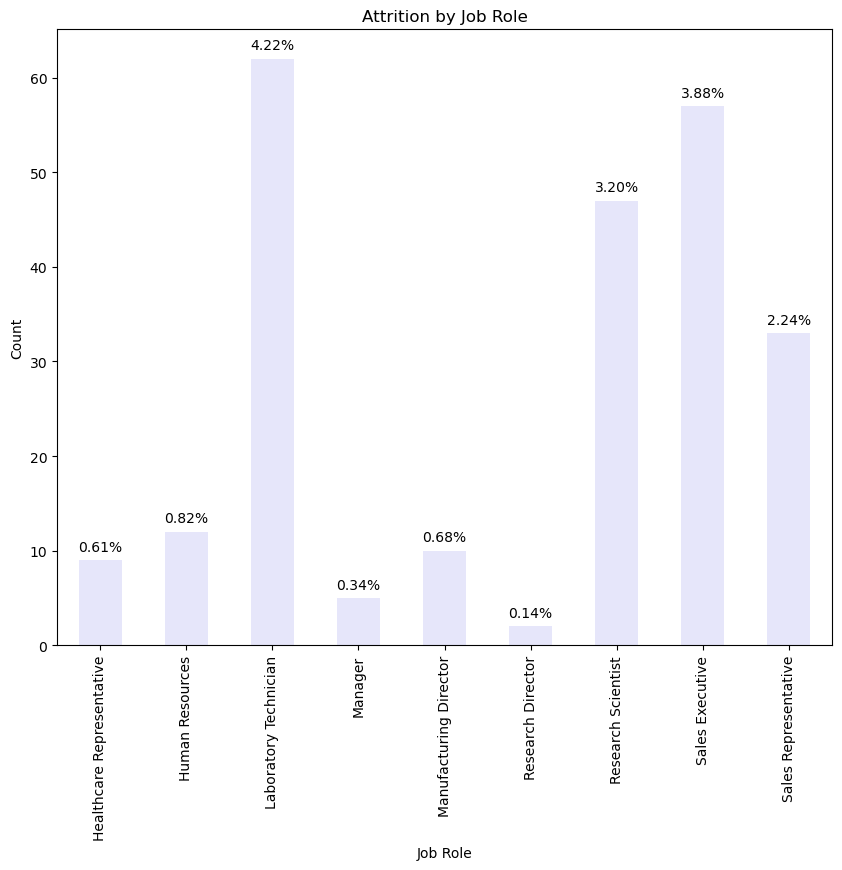

In [14]:
# Grouping Attrition values by Job Role
attrition_count_jobrole = attrition_data.groupby('JobRole')['Attrition'].value_counts().loc[:, 'Yes']

print(attrition_count_jobrole)

attrition_count_jobrole.plot(kind='bar', title='Attrition by Job Role', ylabel='Count',
                                xlabel='Job Role', figsize=(10,8) , color = 'lavender')

#showing the percentage
for i in range(attrition_count_jobrole.shape[0]):
    count = attrition_count_jobrole[i]
    strt = '{:0.2f}%'.format((100 * count)/attrition_data.shape[0])
    plt.text(i, count + 1, strt, ha = 'center', color = 'black', fontsize = 10)

JobInvolvement
1     28
2     71
3    125
4     13
Name: count, dtype: int64


<Axes: title={'center': 'Attrition by Job Involvement'}, xlabel='Job Involvement', ylabel='Count'>

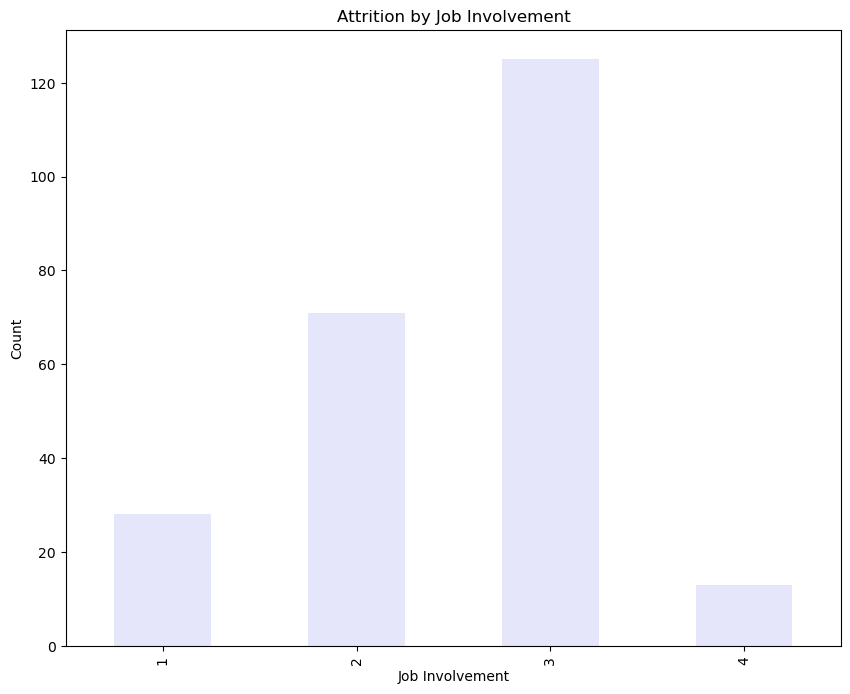

In [15]:
# Grouping Attrition values by Job Involvement
attrition_count_jobinvolvement = attrition_data.groupby('JobInvolvement')['Attrition'].value_counts().loc[:, 'Yes']

print(attrition_count_jobinvolvement)

attrition_count_jobinvolvement.plot(kind='bar', title='Attrition by Job Involvement', ylabel='Count',
                                xlabel='Job Involvement', figsize=(10,8) , color = 'lavender')

#showing the percentage
# for i in range(attrition_count_jobinvolvement.shape[0]):
#     count = attrition_count_jobinvolvement[i]
#     strt = '{:0.2f}%'.format((100 * count)/attrition_data.shape[0])
#     plt.text(i, count + 1, strt, ha = 'center', color = 'black', fontsize = 10)

JobSatisfaction
1    66
2    46
3    73
4    52
Name: count, dtype: int64


<Axes: title={'center': 'Attrition by Job Satisfaction'}, xlabel='Job Satisfaction', ylabel='Count'>

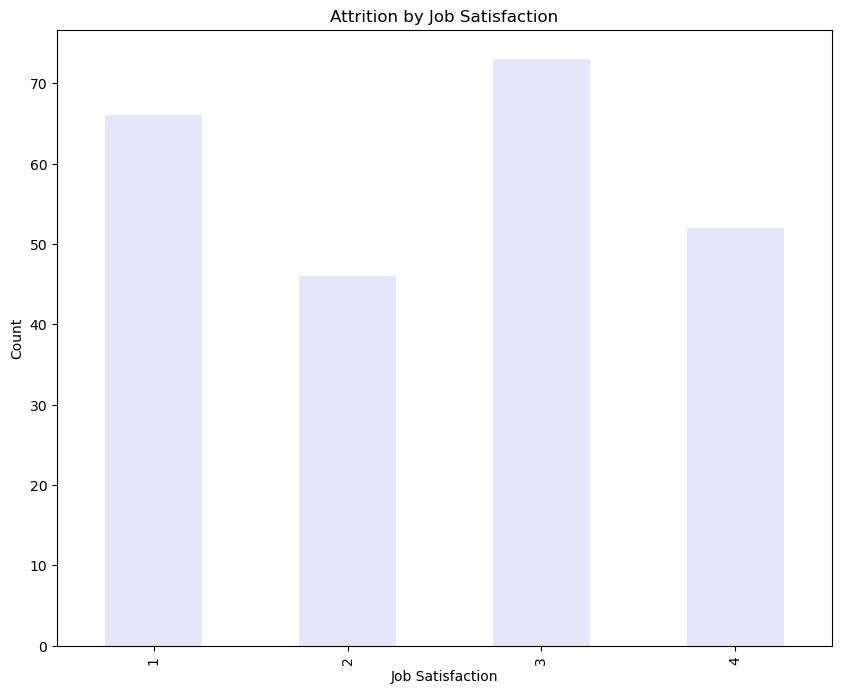

In [16]:
# Grouping Attrition values by Job Level
attrition_count_jobsatisfaction = attrition_data.groupby('JobSatisfaction')['Attrition'].value_counts().loc[:, 'Yes']

print(attrition_count_jobsatisfaction)

attrition_count_jobsatisfaction.plot(kind='bar', title='Attrition by Job Satisfaction', ylabel='Count',
                                xlabel='Job Satisfaction', figsize=(10,8) , color = 'lavender')

#showing the percentage
# for i in range(attrition_count_jobsatisfaction.shape[0]):
#     count = attrition_count_jobrole[i]
#     strt = '{:0.2f}%'.format((100 * count)/attrition_data.shape[0])
#     plt.text(i, count + 1, strt, ha = 'center', color = 'black', fontsize = 10)

BusinessTravel
Non-Travel            12
Travel_Frequently     69
Travel_Rarely        156
Name: count, dtype: int64


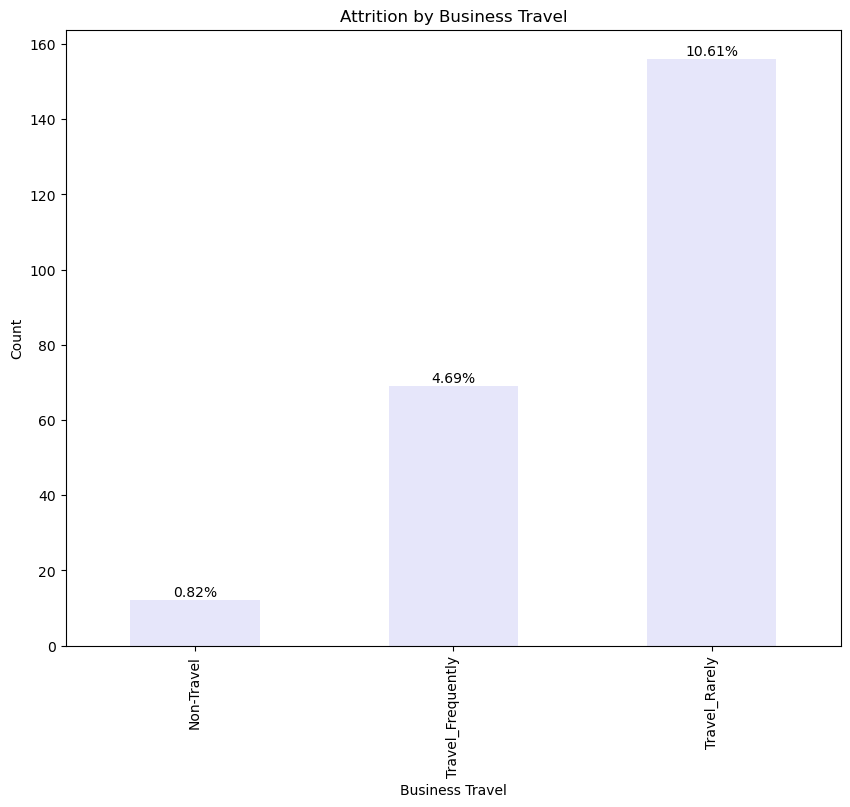

In [18]:
# Grouping Attrition values by Business Travel
attrition_count_businesstravel = attrition_data.groupby('BusinessTravel')['Attrition'].value_counts().loc[:, 'Yes']

print(attrition_count_businesstravel)

attrition_count_businesstravel.plot(kind='bar', title='Attrition by Business Travel', ylabel='Count',
                                xlabel='Business Travel', figsize=(10,8) , color = 'lavender')

# #showing the percentage
for i in range(attrition_count_businesstravel.shape[0]):
    count = attrition_count_businesstravel[i]
    strt = '{:0.2f}%'.format((100 * count)/attrition_data.shape[0])
    plt.text(i, count + 1, strt, ha = 'center', color = 'black', fontsize = 10)

EnvironmentSatisfaction
1    72
2    43
3    62
4    60
Name: count, dtype: int64


<Axes: title={'center': 'Attrition by Environment Satisfaction'}, xlabel='Environment Satisfaction', ylabel='Count'>

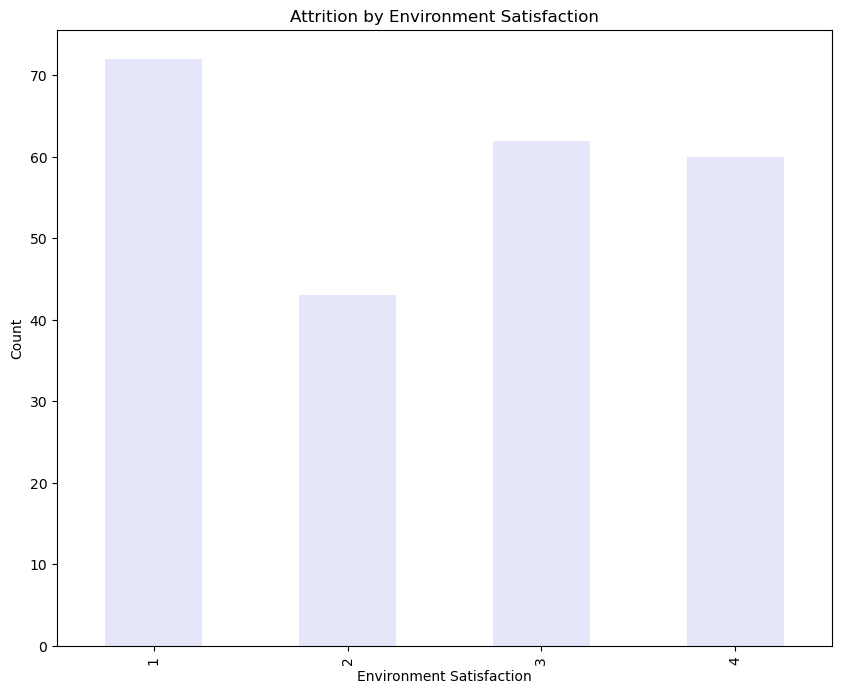

In [25]:
# Grouping Attrition values by Environment Satisfaction
attrition_count_environmentsatisfaction = attrition_data.groupby('EnvironmentSatisfaction')['Attrition'].value_counts().loc[:, 'Yes']

print(attrition_count_environmentsatisfaction)

#
attrition_count_environmentsatisfaction.plot(kind='bar', title='Attrition by Environment Satisfaction', ylabel='Count',
                                xlabel='Environment Satisfaction', figsize=(10,8) , color = 'lavender')

# # # #showing the percentage
# for i in range(attrition_count_environmentsatisfaction.shape[0]):
#     count = attrition_count_environmentsatisfaction[i]
#     strt = '{:0.2f}%'.format((100 * count)/attrition_data.shape[0])
#     plt.text(i, count+1, strt, ha = 'center', color = 'black', fontsize = 10)

RelationshipSatisfaction
1    57
2    45
3    71
4    64
Name: count, dtype: int64


<Axes: title={'center': 'Attrition by Relationship Satisfaction'}, xlabel='Relationship Satisfaction', ylabel='Count'>

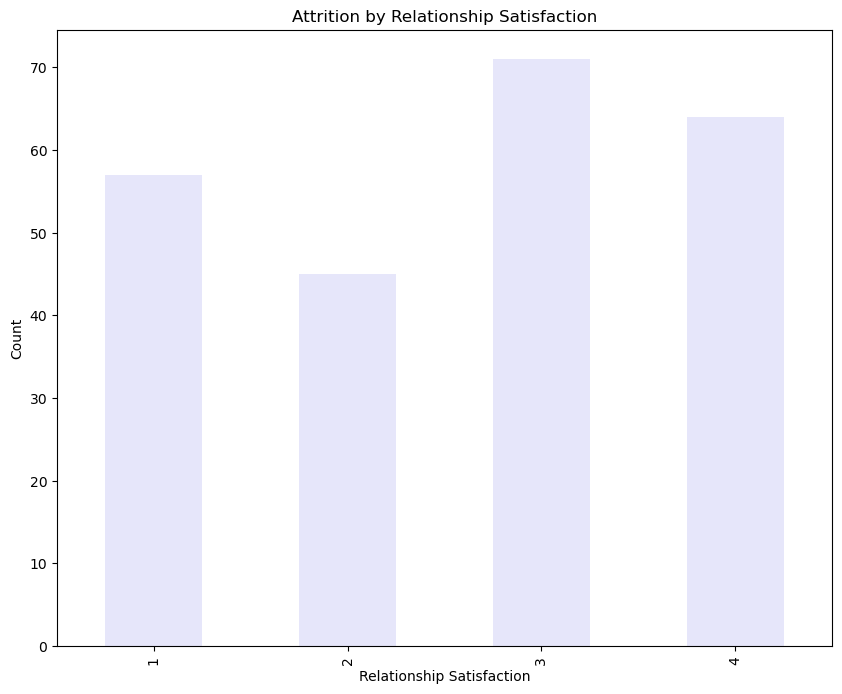

In [218]:
# Grouping Attrition values by Relationship Satisfaction
attrition_count_relationshipsatisfaction = attrition_data.groupby('RelationshipSatisfaction')['Attrition'].value_counts().loc[:, 'Yes']

print(attrition_count_relationshipsatisfaction)

#
attrition_count_relationshipsatisfaction.plot(kind='bar', title='Attrition by Relationship Satisfaction', ylabel='Count',
                                xlabel='Relationship Satisfaction', figsize=(10,8) , color = 'lavender')

# # # #showing the percentage
# for i in range(attrition_count_environmentsatisfaction.shape[0]):
#     count = attrition_count_environmentsatisfaction[i]
#     strt = '{:0.2f}%'.format((100 * count)/attrition_data.shape[0])
#     plt.text(i, count+1, strt, ha = 'center', color = 'black', fontsize = 10)

StandardHours
80    237
Name: count, dtype: int64


<Axes: title={'center': 'Attrition by Standard Hours'}, xlabel='Standard Hours', ylabel='Count'>

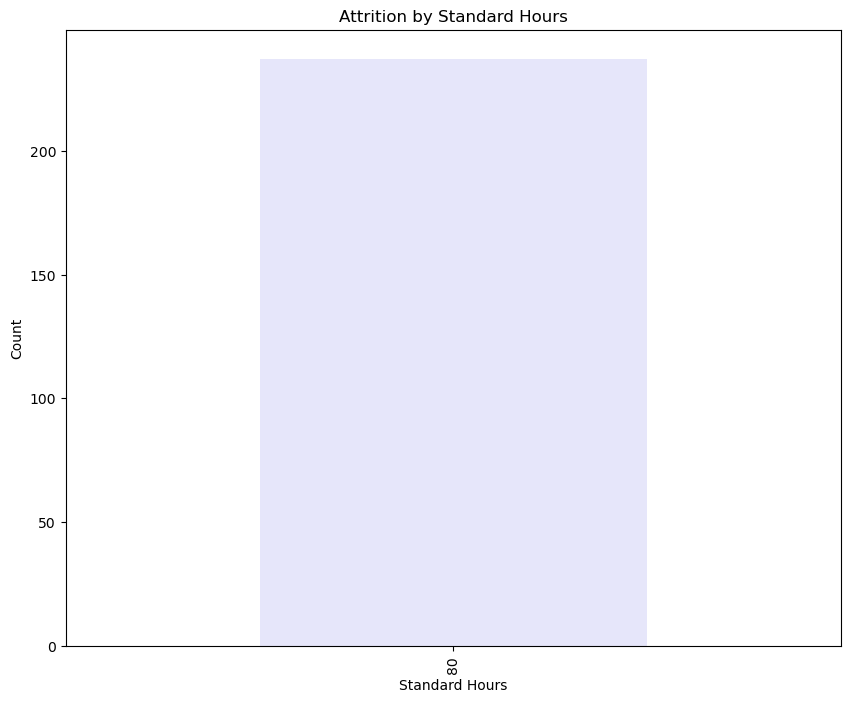

In [219]:
# Grouping Attrition values by Standard Hours
attrition_count_standardhours = attrition_data.groupby('StandardHours')['Attrition'].value_counts().loc[:, 'Yes']

print(attrition_count_standardhours)

#
attrition_count_standardhours.plot(kind='bar', title='Attrition by Standard Hours', ylabel='Count',
                                xlabel='Standard Hours', figsize=(10,8) , color = 'lavender')


StockOptionLevel
0    154
1     56
2     12
3     15
Name: count, dtype: int64


<Axes: title={'center': 'Attrition by Stock Option Level'}, xlabel='Stock Option Level', ylabel='Count'>

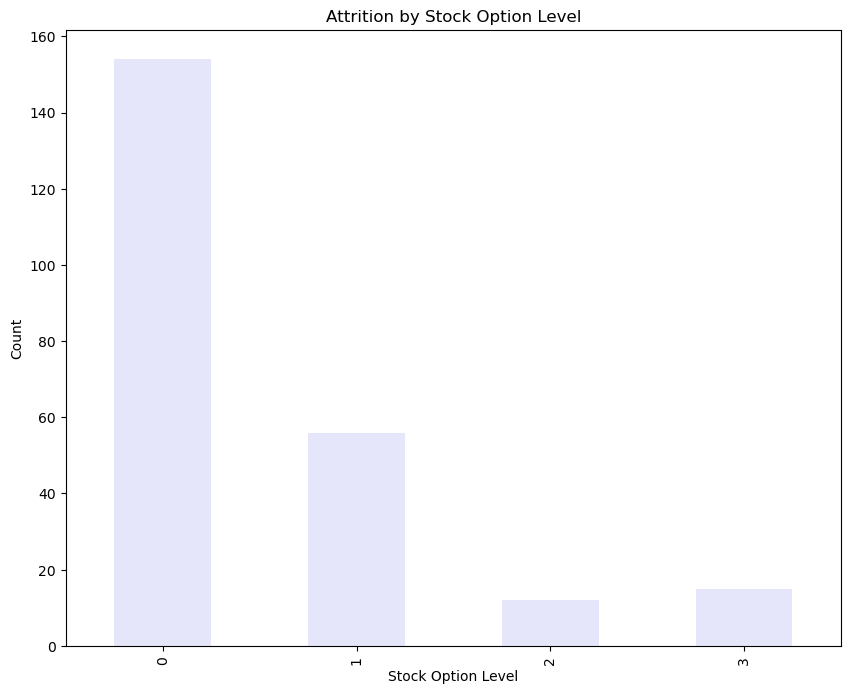

In [220]:
# Grouping Attrition values by Stock Option Level
attrition_count_stockoption = attrition_data.groupby('StockOptionLevel')['Attrition'].value_counts().loc[:, 'Yes']

print(attrition_count_stockoption)

#
attrition_count_stockoption.plot(kind='bar', title='Attrition by Stock Option Level', ylabel='Count',
                                xlabel='Stock Option Level', figsize=(10,8) , color = 'lavender')

# # # #showing the percentage
# for i in range(attrition_count_environmentsatisfaction.shape[0]):
#     count = attrition_count_environmentsatisfaction[i]
#     strt = '{:0.2f}%'.format((100 * count)/attrition_data.shape[0])
#     plt.text(i, count+1, strt, ha = 'center', color = 'black', fontsize = 10)

YearsInCurrentRole
0     73
1     11
2     68
3     16
4     15
5      1
6      2
7     31
8      7
9      6
10     2
12     1
13     1
14     1
15     2
Name: count, dtype: int64


<Axes: title={'center': 'Attrition by Years in Current Role'}, xlabel='Years in Current Role', ylabel='Count'>

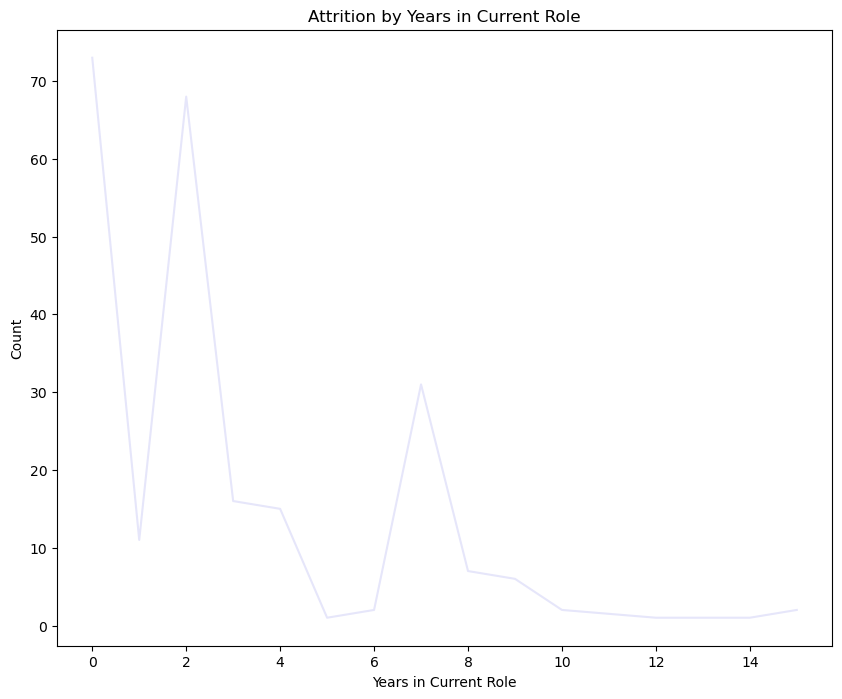

In [225]:
# Grouping Attrition values by Years in Current Role
attrition_count_yearsincurrentrole = attrition_data.groupby('YearsInCurrentRole')['Attrition'].value_counts().loc[:, 'Yes']

print(attrition_count_yearsincurrentrole)

#
attrition_count_yearsincurrentrole.plot(kind='line', title='Attrition by Years in Current Role', ylabel='Count',
                                xlabel='Years in Current Role', figsize=(10,8) , color = 'lavender')

# # # #showing the percentage
# for i in range(attrition_count_environmentsatisfaction.shape[0]):
#     count = attrition_count_environmentsatisfaction[i]
#     strt = '{:0.2f}%'.format((100 * count)/attrition_data.shape[0])
#     plt.text(i, count+1, strt, ha = 'center', color = 'black', fontsize = 10)

YearsSinceLastPromotion
0     110
1      49
2      27
3       9
4       5
5       2
6       6
7      16
9       4
10      1
11      2
13      2
14      1
15      3
Name: count, dtype: int64


<Axes: title={'center': 'Attrition by Years since Last Promotion'}, xlabel='Years since Last Promotion', ylabel='Count'>

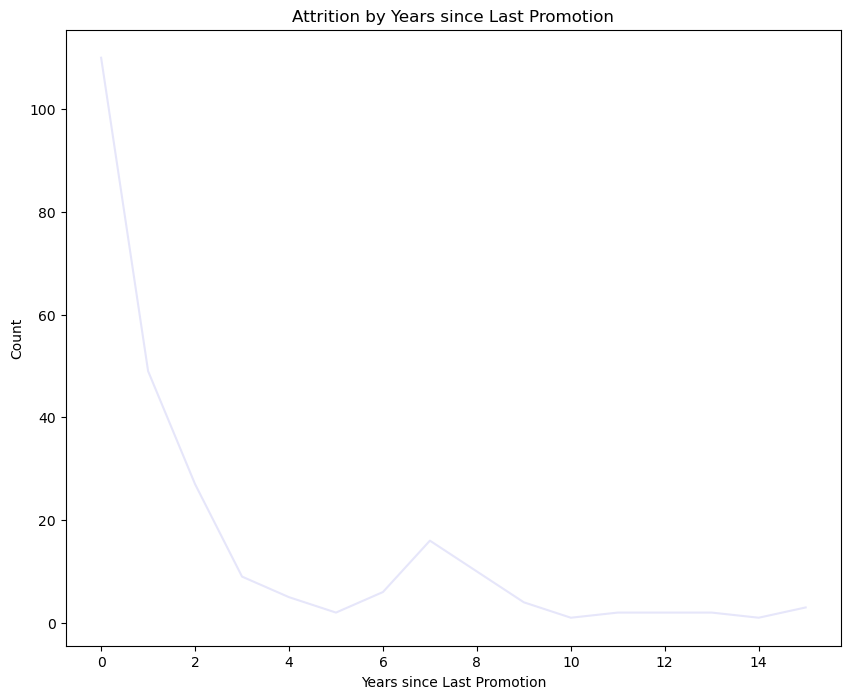

In [226]:
# Grouping Attrition values by Years since Last Promotion
attrition_count_yearssincelastpromotion = attrition_data.groupby('YearsSinceLastPromotion')['Attrition'].value_counts().loc[:, 'Yes']

print(attrition_count_yearssincelastpromotion)

#
attrition_count_yearssincelastpromotion.plot(kind='line', title='Attrition by Years since Last Promotion', ylabel='Count',
                                xlabel='Years since Last Promotion', figsize=(10,8) , color = 'lavender')

# # # #showing the percentage
# for i in range(attrition_count_environmentsatisfaction.shape[0]):
#     count = attrition_count_environmentsatisfaction[i]
#     strt = '{:0.2f}%'.format((100 * count)/attrition_data.shape[0])
#     plt.text(i, count+1, strt, ha = 'center', color = 'black', fontsize = 10)

YearsWithCurrManager
0     85
1     11
2     50
3     19
4     11
5      4
6      4
7     31
8     10
9      6
10     3
11     1
14     2
Name: count, dtype: int64


<Axes: title={'center': 'Attrition by Years with Current Manager'}, xlabel='Years with Current Manager', ylabel='Count'>

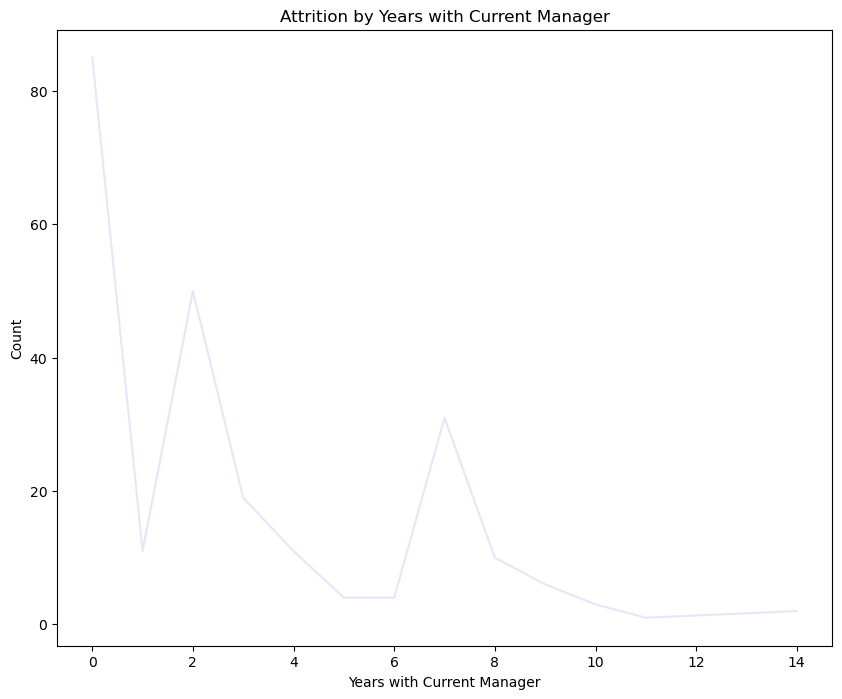

In [227]:
# Grouping Attrition values by Years with Current Manager
attrition_count_yearswithcurrmanager = attrition_data.groupby('YearsWithCurrManager')['Attrition'].value_counts().loc[:, 'Yes']

print(attrition_count_yearswithcurrmanager)

#
attrition_count_yearswithcurrmanager.plot(kind='line', title='Attrition by Years with Current Manager', ylabel='Count',
                                xlabel='Years with Current Manager', figsize=(10,8) , color = 'lavender')

# # # #showing the percentage
# for i in range(attrition_count_environmentsatisfaction.shape[0]):
#     count = attrition_count_environmentsatisfaction[i]
#     strt = '{:0.2f}%'.format((100 * count)/attrition_data.shape[0])
#     plt.text(i, count+1, strt, ha = 'center', color = 'black', fontsize = 10)

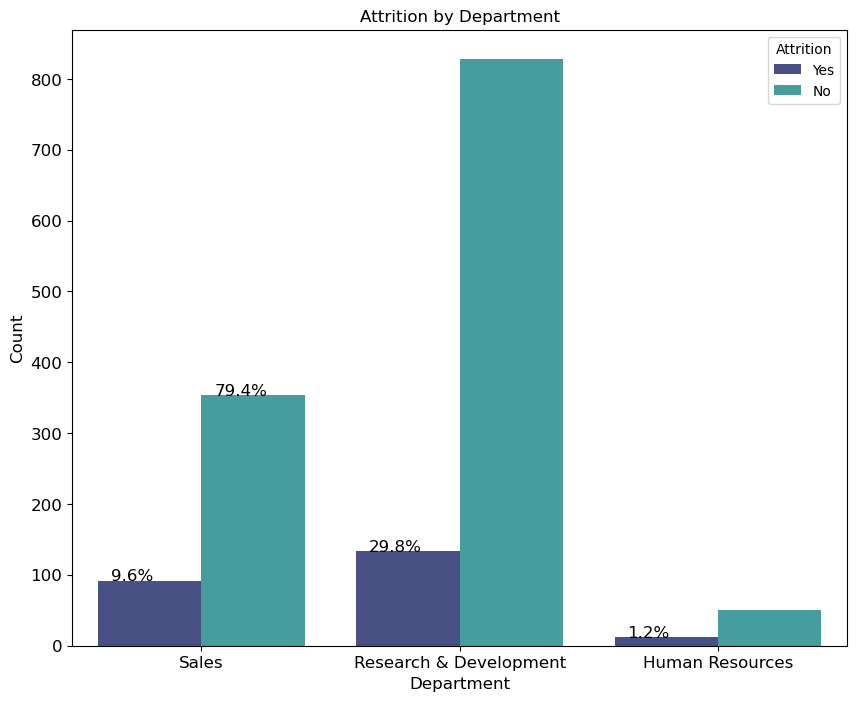

In [228]:
# Defining a function to assign percentages for grouped count plots
def with_hue(ax, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in ax.patches]
    patch = [p for p in ax.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j* Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j* Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j* Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)

# Creating a count plot for Attrition by Department
plt.figure(figsize = (10,8))
ax = sns.countplot(x = 'Department', hue= 'Attrition', data = attrition_data, palette = 'mako')
plt.title("Attrition by Department")
plt.xticks(size = 12)
plt.xlabel('Department', size = 12)
plt.yticks(size = 12)
plt.ylabel('Count', size = 12)
with_hue(ax, attrition_data.Department,2,2)

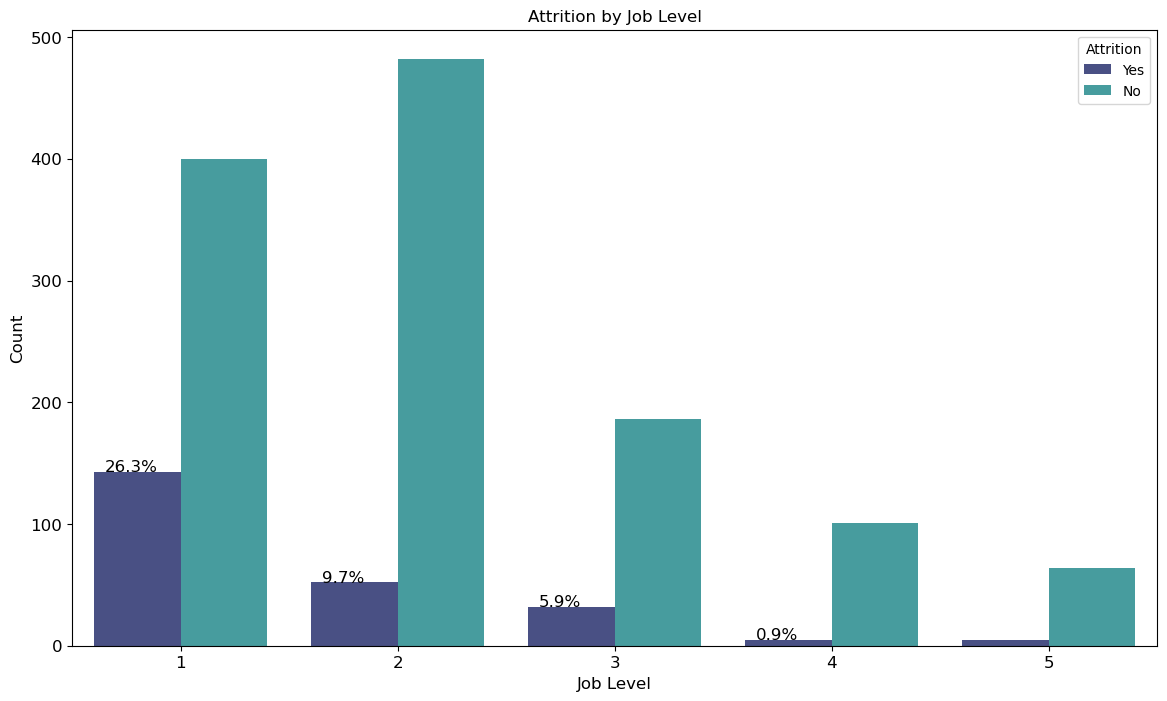

In [229]:
# Creating a count plot for Attrition by Job Level
plt.figure(figsize = (14,8))
ax = sns.countplot(x = 'JobLevel', hue= 'Attrition', data = attrition_data, palette = 'mako')
plt.title("Attrition by Job Level")
plt.xticks(size = 12)
plt.xlabel('Job Level', size = 12)
plt.yticks(size = 12)
plt.ylabel('Count', size = 12)
with_hue(ax, attrition_data.JobLevel,2,2)

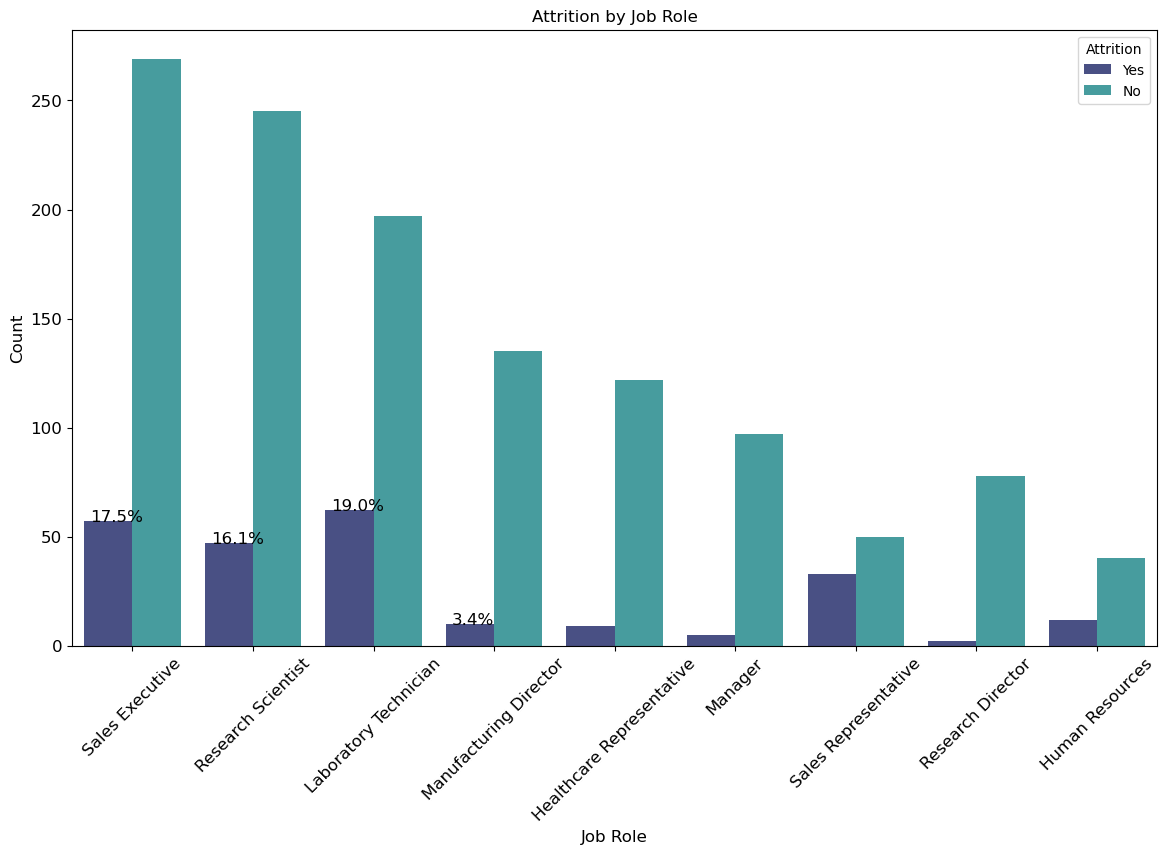

In [230]:
# Creating a count plot for Attrition by Job Role
plt.figure(figsize = (14,8))
ax = sns.countplot(x = 'JobRole', hue= 'Attrition', data = attrition_data, palette = 'mako')
plt.title("Attrition by Job Role")
plt.xticks(size = 12, rotation = 45)
plt.xlabel('Job Role', size = 12)
plt.yticks(size = 12)
plt.ylabel('Count', size = 12)
with_hue(ax, attrition_data.JobRole,2,2)

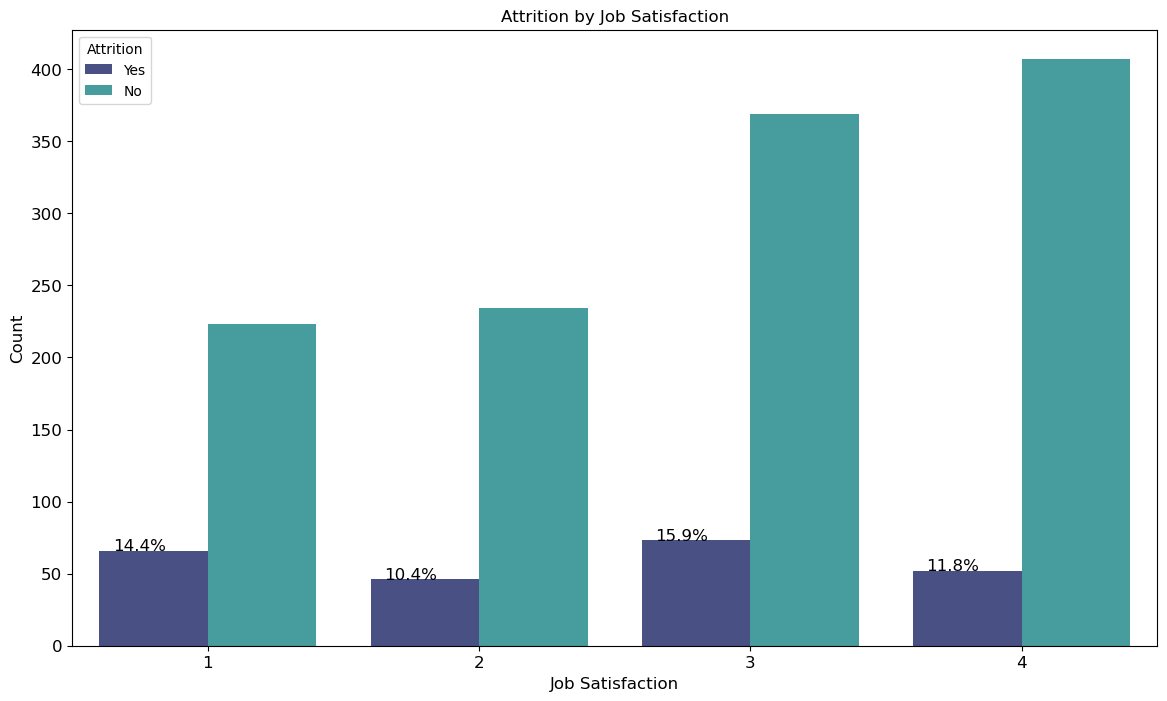

In [231]:
# Creating a count plot for Attrition by Job Role
plt.figure(figsize = (14,8))
ax = sns.countplot(x = 'JobSatisfaction', hue= 'Attrition', data = attrition_data, palette = 'mako')
plt.title("Attrition by Job Satisfaction")
plt.xticks(size = 12)
plt.xlabel('Job Satisfaction', size = 12)
plt.yticks(size = 12)
plt.ylabel('Count', size = 12)
with_hue(ax, attrition_data.JobSatisfaction,2,2)

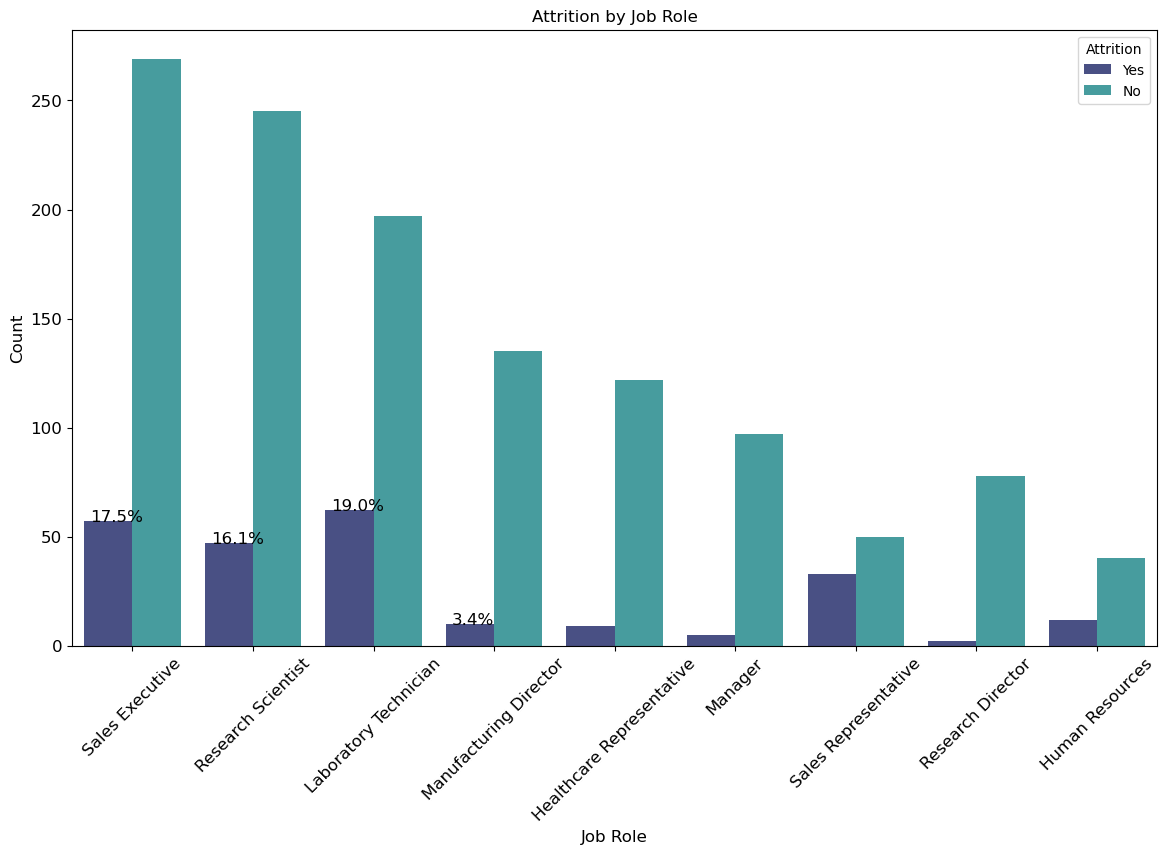

In [232]:
# Creating a count plot for Attrition by Job Role
plt.figure(figsize = (14,8))
ax = sns.countplot(x = 'JobRole', hue= 'Attrition', data = attrition_data, palette = 'mako')
plt.title("Attrition by Job Role")
plt.xticks(size = 12, rotation = 45)
plt.xlabel('Job Role', size = 12)
plt.yticks(size = 12)
plt.ylabel('Count', size = 12)
with_hue(ax, attrition_data.JobRole,2,2)

## Data Preprocessing

In [69]:
#import preprocessing libraries
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score

#import dimensionality reduction libraries
from sklearn.decomposition import PCA

#import algorithm libraries
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [70]:
# Get list of categorical columns
s = (attrition_data.dtypes == 'object')
object_cols = list(s[s].index)

# apply label encoder to all the categorical columns
data_copy = attrition_data.copy()
le = LabelEncoder()
for col in object_cols:
    data_copy[col] = le.fit_transform(data_copy[col].astype(str))
    
 # get the x and y value
x,y = data_copy.drop(columns = 'Attrition'), data_copy['Attrition']  

In [71]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state= 142)
for train_index, val_index in skf.split(x,y):
    train_x, val_x = x.iloc[train_index], x.iloc[val_index]
    train_y, val_y = y.iloc[train_index], y.iloc[val_index]
    
train_x.shape, val_x.shape  

((1176, 34), (294, 34))

In [72]:
dtc_model = DecisionTreeClassifier(criterion="entropy", max_depth=67)

# Train Decision Tree Classifer
dtc_model.fit(train_x,train_y)

#Predict the response for validation dataset
y_pred = dtc_model.predict(val_x)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(val_y, y_pred))

Accuracy: 0.7687074829931972


In [73]:
#create a function to get the importance of features

def feat_imp(model, data, text):
    importances = model.feature_importances_
    
    #sort features in decreasing order of their importance
    indices = np.argsort(importances)[::-1]
    
    # Rearrange feature names so they match the sorted feature importances
    names = [data.columns[i] for i in indices]
    
    # Create plot
    plt.figure(figsize=(14,6))

    # Create plot title
    plt.title(text)

    # Add bars
    plt.bar(range(train_x.shape[1]), importances[indices])

    # Add feature names as x-axis labels
    plt.xticks(range(train_x.shape[1]), names, rotation=90)

    # Show plot
    plt.show()

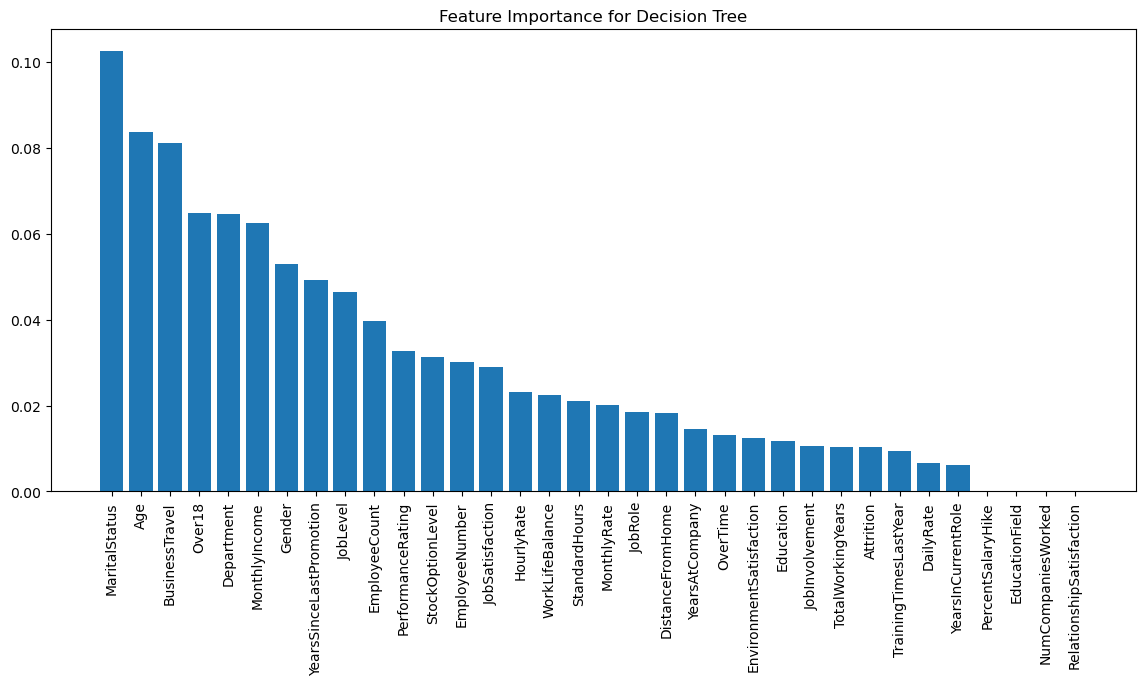

In [74]:
feat_imp(dtc_model,attrition_data, "Feature Importance for Decision Tree")

## Model Building and Validation

In [75]:
attrition_data_fe = attrition_data.drop(['NumCompaniesWorked', 'EducationField','PercentSalaryHike','JobInvolvement','Over18'], axis=1)
y = attrition_data_fe.copy()['Attrition']
X = attrition_data_fe.copy()

X.pop('Attrition')
n_samples,n_features = X.shape
print(n_samples,'samples with',n_features,'features')
X.head()

1470 samples with 29 features


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,1,1,2,Female,...,1,80,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,1,2,3,Male,...,4,80,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,1,4,4,Male,...,2,80,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,1,5,4,Female,...,3,80,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,1,7,1,Male,...,4,80,1,6,3,3,2,2,2,2


In [76]:
#Checking if any of the columns are of type object
from pandas.api.types import is_object_dtype

for col in X.columns:
    if is_object_dtype(X[col]):
     print(X[col].value_counts(normalize = True))
     print()

BusinessTravel
Travel_Rarely        0.709524
Travel_Frequently    0.188435
Non-Travel           0.102041
Name: proportion, dtype: float64

Department
Research & Development    0.653741
Sales                     0.303401
Human Resources           0.042857
Name: proportion, dtype: float64

Gender
Male      0.6
Female    0.4
Name: proportion, dtype: float64

JobRole
Sales Executive              0.221769
Research Scientist           0.198639
Laboratory Technician        0.176190
Manufacturing Director       0.098639
Healthcare Representative    0.089116
Manager                      0.069388
Sales Representative         0.056463
Research Director            0.054422
Human Resources              0.035374
Name: proportion, dtype: float64

MaritalStatus
Married     0.457823
Single      0.319728
Divorced    0.222449
Name: proportion, dtype: float64

OverTime
No     0.717007
Yes    0.282993
Name: proportion, dtype: float64



In [77]:
#One-hot Encoding or dummy variables for numerical values
#Out of categorical values
X = pd.get_dummies(X)
X.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobLevel,JobSatisfaction,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,2,4,...,False,False,False,True,False,False,False,True,False,True
1,49,279,8,1,1,2,3,61,2,2,...,False,False,True,False,False,False,True,False,True,False
2,37,1373,2,2,1,4,4,92,1,3,...,False,False,False,False,False,False,False,True,False,True
3,33,1392,3,4,1,5,4,56,1,3,...,False,False,True,False,False,False,True,False,False,True
4,27,591,2,1,1,7,1,40,1,2,...,False,False,False,False,False,False,True,False,True,False


In [78]:
#Dropping the redundant values 
y = pd.get_dummies(y, drop_first = True)
y.head()

,Yes
0,True
1,False
2,True
3,False
4,False


In [79]:
#Importing StandardScaler
from sklearn.preprocessing import StandardScaler

X.columns = X.columns.astype(str)

#Creating a StandardScaler Object
scaler = StandardScaler()
Xnum = scaler.fit_transform(X)

#Defining the values in y as a 1D numpy array
ynum = y.values.ravel()

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#Logistic Regression
classifier = LogisticRegression(solver = 'liblinear')

#Splitting our dataset for training and testing
Xtrain, Xtest, ytrain, ytest = train_test_split (Xnum, ynum, test_size = 0.2, random_state = 0)

#Training the regressor
classifier.fit(Xtrain, ytrain)

#Printing the mean accuracy of the classifier using .score()
print('Mean accuracy', classifier.score(Xtrain, ytrain))

Mean accuracy 0.8818027210884354


In [81]:
from sklearn.metrics import classification_report

classifier = LogisticRegression(solver = 'liblinear')

#Training to get predictions
classifier.fit(Xtrain, ytrain)
ypred = classifier.predict(Xtest)
print('LogisticRegression'.center(64,'='))
print(classification_report(ytest,ypred,target_names = ['no','yes']))
print('='*64)

=======================LogisticRegression=======================
              precision    recall  f1-score   support

          no       0.88      0.98      0.93       245
         yes       0.81      0.35      0.49        49

    accuracy                           0.88       294
   macro avg       0.85      0.67      0.71       294
weighted avg       0.87      0.88      0.86       294



In [82]:
from sklearn.dummy import DummyClassifier

# Create a DummyClassifier object
dumb_classifier = DummyClassifier(strategy='most_frequent')

# Fit the classifier to your training data (Xtrain, ytrain)
dumb_classifier.fit(Xtrain, ytrain)

# Now you can use the score method to evaluate its performance
print('DummyClassifier mean accuracy:', dumb_classifier.score(Xtrain, ytrain))

DummyClassifier mean accuracy: 0.8401360544217688


In [83]:
print('DummyClassifier'.center(64,'='))
print(classification_report(ytest, dumb_classifier.predict(Xtest),target_names = ['no','yes']))
print('='*64)

========================DummyClassifier=========================
              precision    recall  f1-score   support

          no       0.83      1.00      0.91       245
         yes       0.00      0.00      0.00        49

    accuracy                           0.83       294
   macro avg       0.42      0.50      0.45       294
weighted avg       0.69      0.83      0.76       294



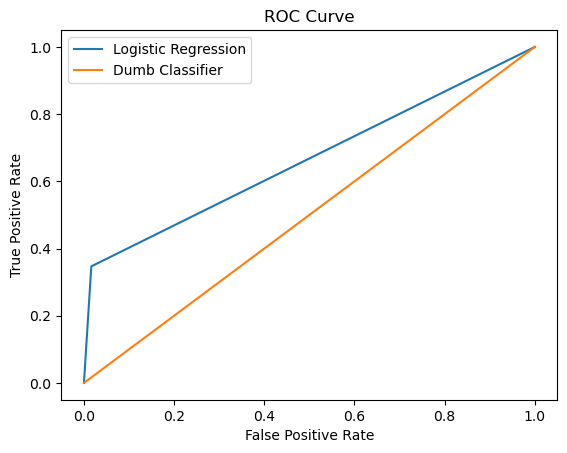

In [84]:
#Determining the ROC Curve
from sklearn.metrics import roc_curve

#Defining the two classifiers from above
classifier = LogisticRegression(solver = 'liblinear')
dumb_classifier = DummyClassifier(strategy = 'most_frequent')

#Training and getting predictions
classifier.fit(Xtrain, ytrain)
dumb_classifier.fit(Xtrain, ytrain)
ypred = classifier.predict(Xtest)
ypred_dumb = dumb_classifier.predict(Xtest)

#Defining ROC metrics to evaluate model performance
fp_rate, tp_rate, _ = roc_curve(ytest,ypred)
fp_rate_dumb, tp_rate_dumb, _ = roc_curve(ytest, ypred_dumb)

#Plots for visualization of curves
plt.title('ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot(fp_rate, tp_rate, label = 'Logistic Regression')
plt.plot(fp_rate_dumb, tp_rate_dumb, label = 'Dumb Classifier')
plt.legend()

In [85]:
from sklearn.metrics import roc_auc_score

print("AUC of Logistic Regression ROC Curve: %1.2f" % roc_auc_score(ytest, ypred))
print("AUC of Dumb Classifier ROC Curve: %1.2f"% roc_auc_score(ytest, ypred_dumb))

AUC of Logistic Regression ROC Curve: 0.67
AUC of Dumb Classifier ROC Curve: 0.50


In [86]:
#Defining Class Weight
classifier = LogisticRegression(solver = 'liblinear', class_weight = 'balanced')

#Training and getting predictions
classifier.fit(Xtrain, ytrain)
print('Balanced Logistic Regression mean accuracy', classifier.score(Xtest, ytest))
classifier.predict(Xtest)
print('Balanced LogisticRegression'.center(64,'='))
print(classification_report(ytest,ypred,target_names = ['no','yes']))
print('='*64)

Balanced Logistic Regression mean accuracy 0.7482993197278912
==================Balanced LogisticRegression===================
              precision    recall  f1-score   support

          no       0.88      0.98      0.93       245
         yes       0.81      0.35      0.49        49

    accuracy                           0.88       294
   macro avg       0.85      0.67      0.71       294
weighted avg       0.87      0.88      0.86       294



In [87]:
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve

#Plotting Learning Curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, shuffle=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="y",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt

#Plotting the Validation Curve
def plot_validation_curve(estimator, title, X, y, param_name, param_range, ylim=None, cv=5,
                        n_jobs=None, scoring=None):
    train_scores, test_scores = validation_curve(
        estimator, Xnum, ynum, param_name=param_name, param_range=param_range,
        cv=cv, scoring=scoring, n_jobs=n_jobs)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.semilogx(param_range, train_scores_mean, label="Training score",
                 color="red", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="blue", lw=lw)
    plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
                 color="turquoise", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="turquoise", lw=lw)
    plt.legend(loc="best")
    plt.show()
    return plt

<module 'matplotlib.pyplot' from '/Users/akshathailangovan/anaconda3/lib/python3.11/site-packages/matplotlib/pyplot.py'>

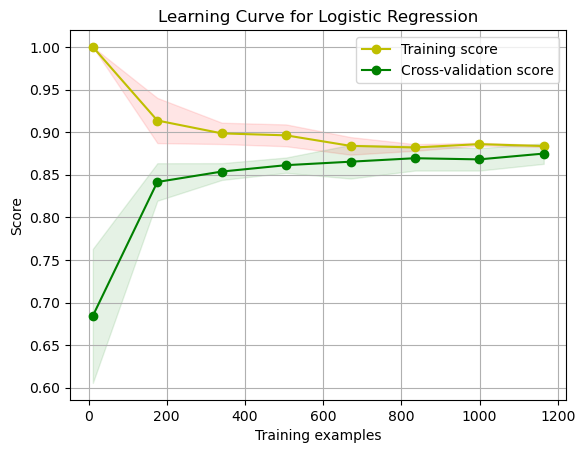

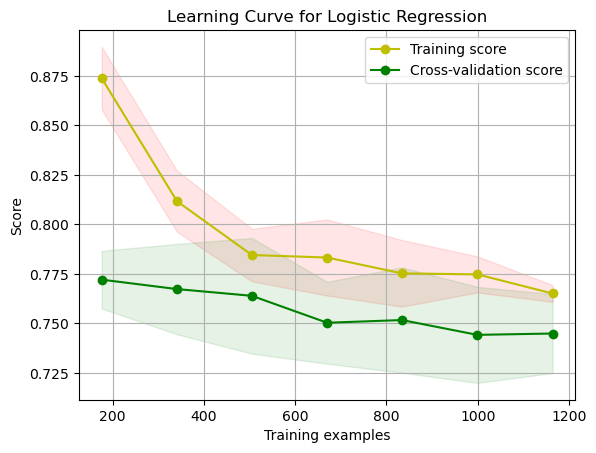

In [91]:
plot_learning_curve(LogisticRegression(solver='liblinear', penalty='l1'), 'Learning Curve for Logistic Regression', Xnum, ynum, cv=5, train_sizes=np.linspace(0.01, 0.99, 8))
plot_learning_curve(LogisticRegression(solver='liblinear', penalty='l1', class_weight='balanced'), 'Learning Curve for Logistic Regression', Xnum, ynum, cv=5, train_sizes=np.linspace(0.01, 0.99, 8))

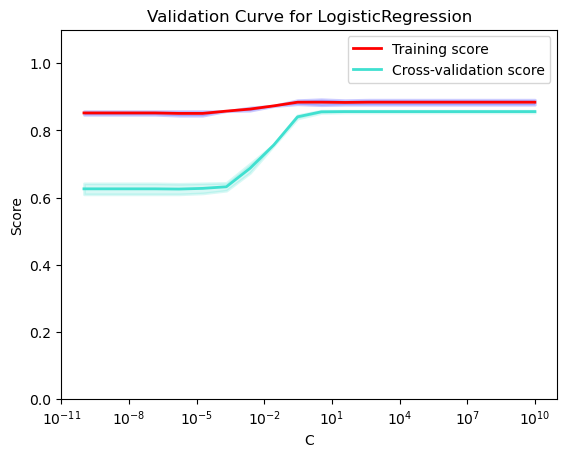

<module 'matplotlib.pyplot' from '/Users/akshathailangovan/anaconda3/lib/python3.11/site-packages/matplotlib/pyplot.py'>

In [89]:
from sklearn.model_selection import learning_curve
param_range = np.logspace(-10, 10, 20)
plot_validation_curve(LogisticRegression(solver='liblinear'), 'Validation Curve for LogisticRegression', Xnum, ynum, "C", param_range, cv=2)